# Project Title : Seoul Bike Sharing Demand Prediction

## <b> Problem Description </b>

### In this assignment,  develop a predictive model for the number of rented bikes in Seoul using the Seoul Bike Sharing Demand dataset. Important point is model need to be multi linear regression model and if it's possible achieve a higher R2 by using appropriate transformations on the predictors, or fine-tuning your model.

## EDA

Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

### Loading the dataset

In [2]:
data= pd.read_csv("data/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [3]:
# Copy the data for backup
df = data.copy()

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Data shape
df.shape

(8760, 14)

In [6]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Statistical info 
df.describe(include='all').transpose()

count unique         top  freq         mean  \
Date                         8760    365  30/11/2018    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [8]:
df.isnull().sum().transpose()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Data Description
there is no missing value
- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour: target
- Hour - Hour of the day when bike is rented
- Temperature-Temperature of date, celcious
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature(이슬점) Celsius
- Solar radiation - MJ/m2, 태양 복사에너지
- Rainfall - mm
- Snowfall - cm 적설량 
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours): 정상 운행여부

### Preprocessing the data

In [9]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Checking duplicate
df.duplicated().sum()
df[df.duplicated()]

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

In [11]:
# converting date column dtype object to date 
df['Date']= pd.to_datetime(df['Date'], dayfirst=True)

In [12]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [13]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

In [14]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week     month  year  
0      Friday  December  2017  
1      Friday  December  2017  
2      Friday  December  2017  
3      Friday  December  2017  
4      Friday  December  2017

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

In [16]:
# convert Hour column integer to Categorical 
# Hour는 빌린 시간을 의미하지만 categorical로 해석하는게 맞음, 어느 시간대인지가 중요하지 숫자상 의미는 X
df['Hour']=df['Hour'].astype('object')

In [17]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [18]:
numeric_features.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

In [19]:
categorical_features.head()

Hour Seasons     Holiday Functioning Day day_of_week     month  year
0    0  Winter  No Holiday             Yes      Friday  December  2017
1    1  Winter  No Holiday             Yes      Friday  December  2017
2    2  Winter  No Holiday             Yes      Friday  December  2017
3    3  Winter  No Holiday             Yes      Friday  December  2017
4    4  Winter  No Holiday             Yes      Friday  December  2017

In [ ]:
categorical_features['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

### Visualiztion and numerical

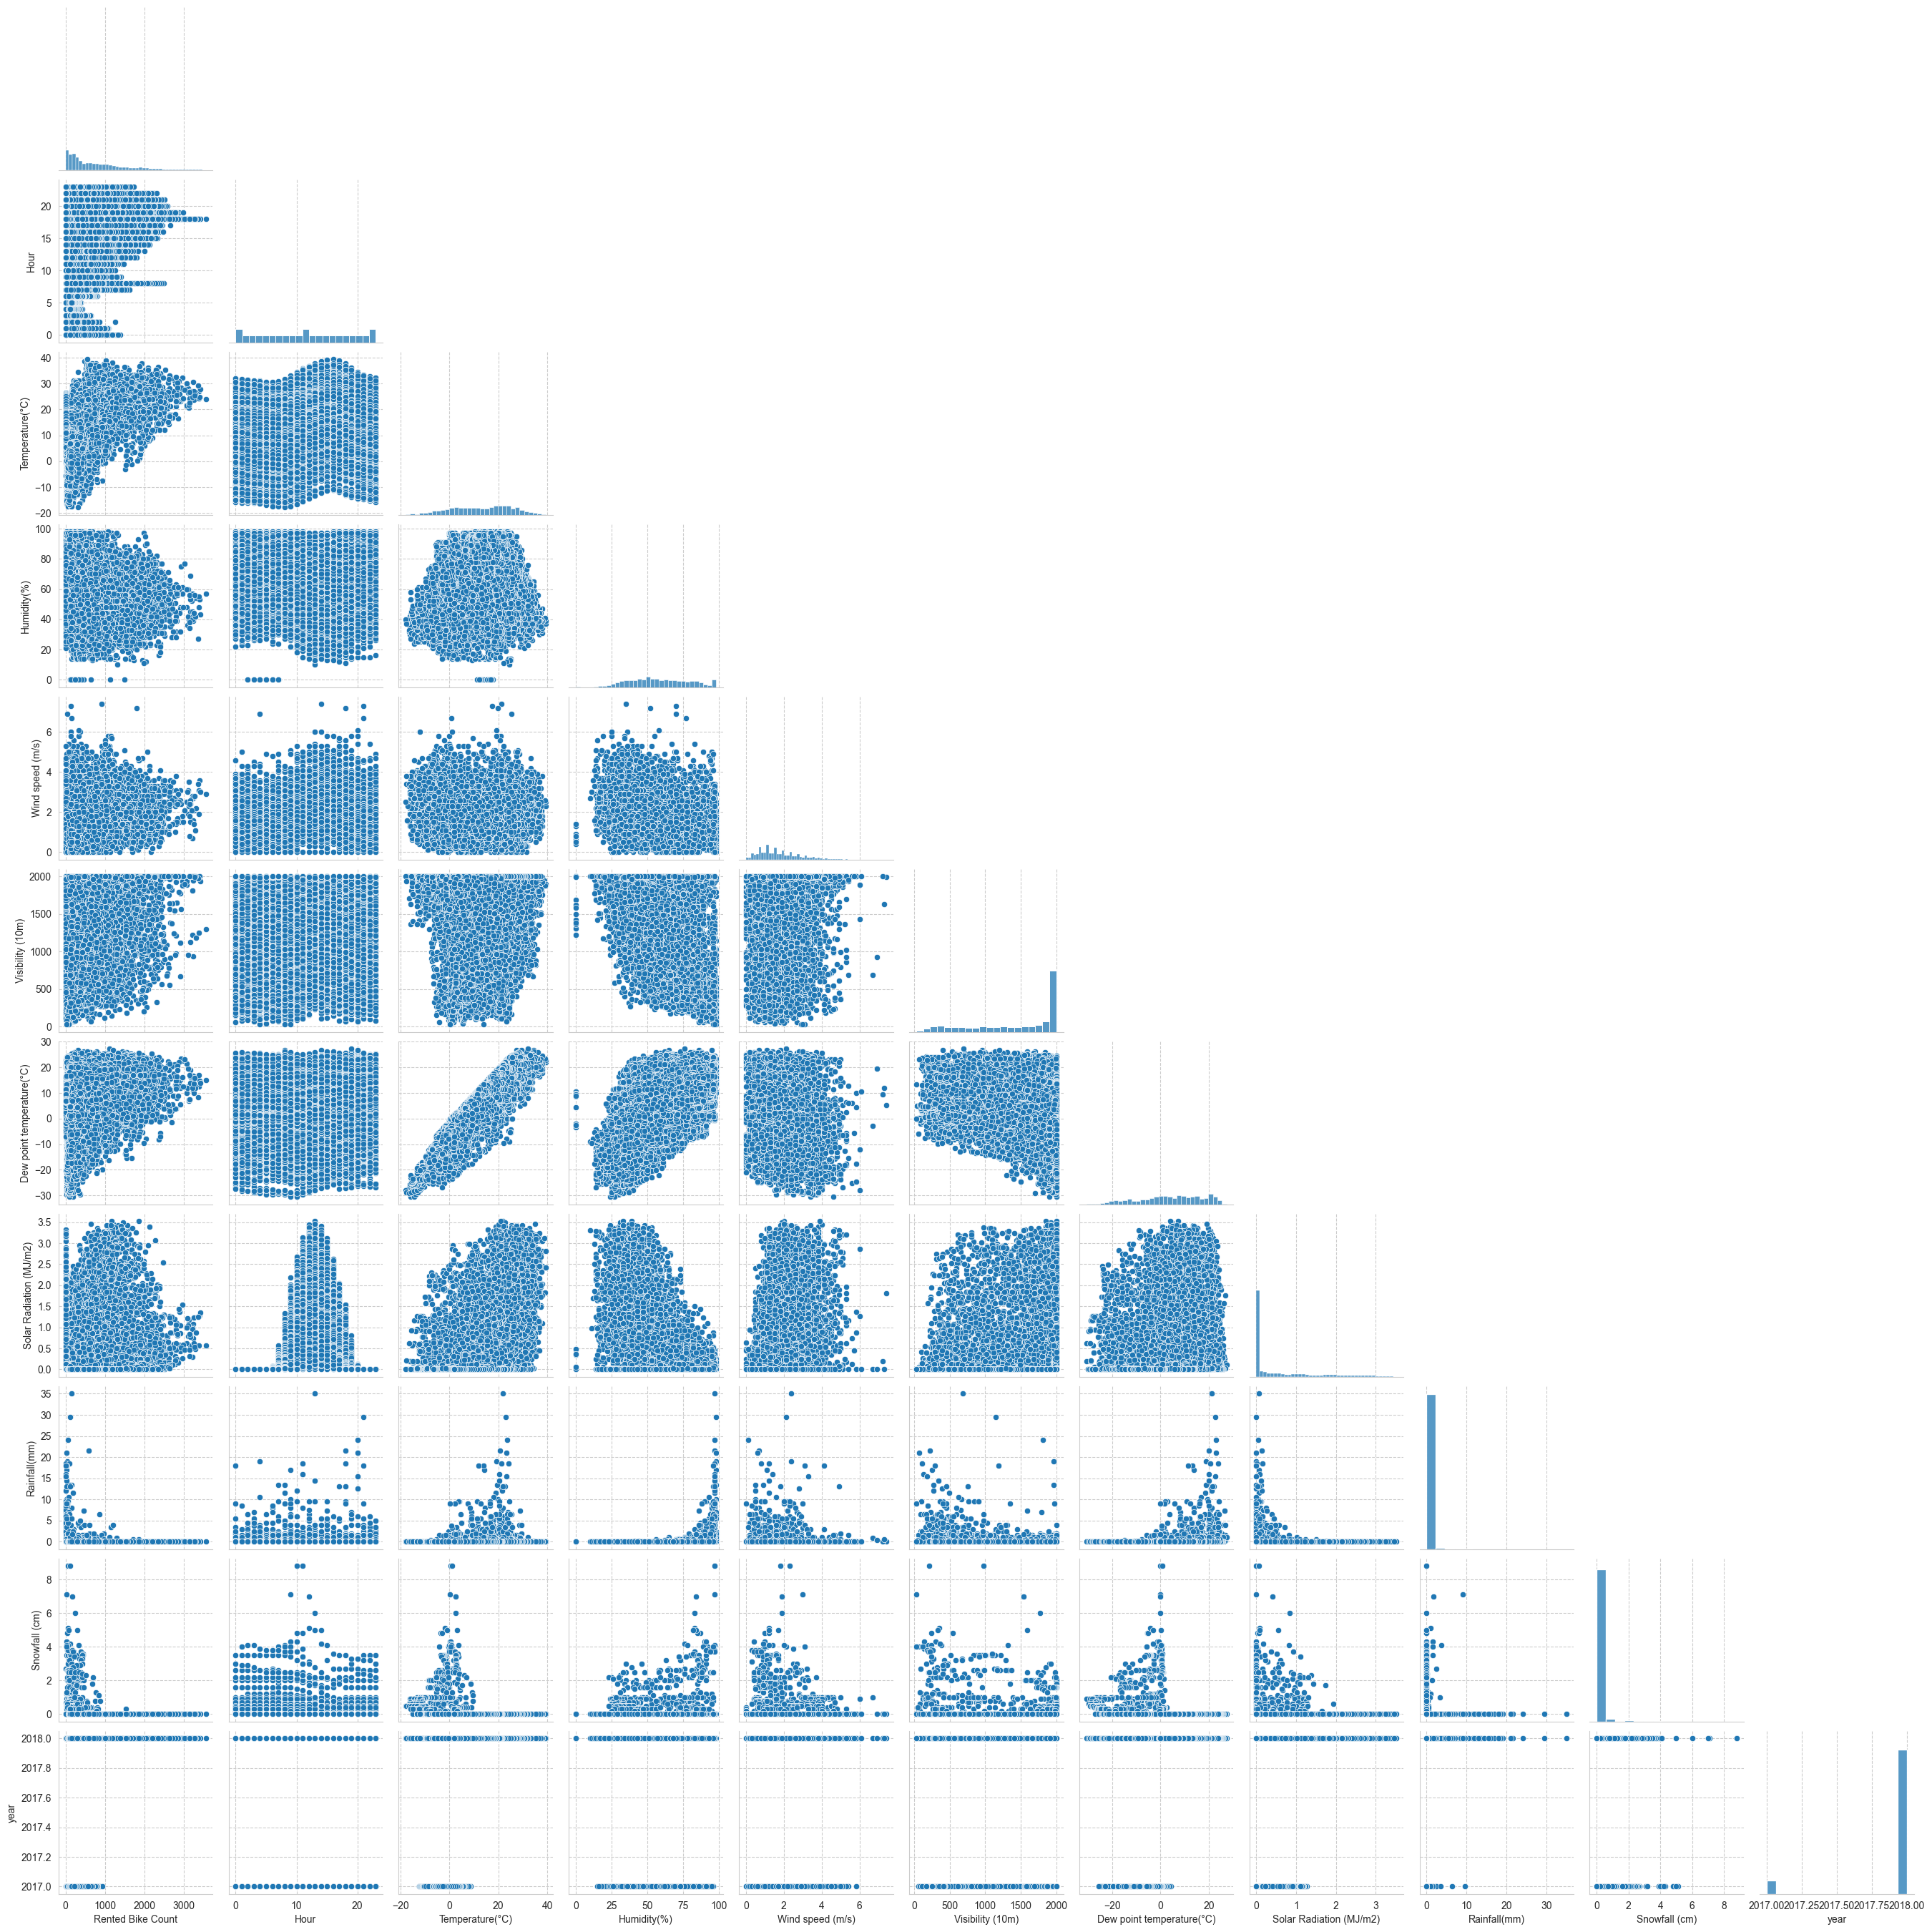

In [21]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

🎯 1. 타깃 변수 (Rented Bike Count)와의 관계
Temperature(°C):

양의 관계가 뚜렷하게 관찰됨 (기온이 높을수록 대여량 증가)

매우 명확한 비선형 추세 → 선형회귀 사용 시 다항식 또는 트리 기반 모델 고려

Dew point temperature(°C):

역시 기온과 비슷한 형태의 양의 관계

→ Temperature와 높은 상관관계를 가지므로 다중공선성 주의

Solar Radiation (MJ/m²):

0값이 많아 뾰족한 분포 형태이지만, 대여량 증가와 연관 있음

좋은 날씨일수록 자전거 대여량 증가

Hour:

뚜렷한 이중 봉우리(Bimodal) 분포 → 출근·퇴근 시간 수요 반영

명확한 비선형성 -> 출근 / 퇴근으로 분리해도 좋을듯

Humidity(%), Rainfall(mm), Snowfall(cm):

음의 관계 보임

특히 Rainfall, Snowfall은 0 근처의 값이 대부분이지만 강수/적설 시 수요 급감

→ 강한 억제 효과 존재

🔁 2. 독립 변수들 간의 상관성 (공선성 가능성)
Temperature ↔ Dew point temperature:

매우 강한 선형관계 → 다중공선성 문제 있음

둘 중 하나만 사용하는 것이 안정적

Rainfall / Snowfall / Solar Radiation:

서로 다른 분포, 크게 상관은 없으나 모두 0 중심의 희소 데이터

→ 로그 변환 또는 이진화도 고려 가능

Humidity ↔ Dew Point:

온도 정보와 결합된 변수들이므로 주의

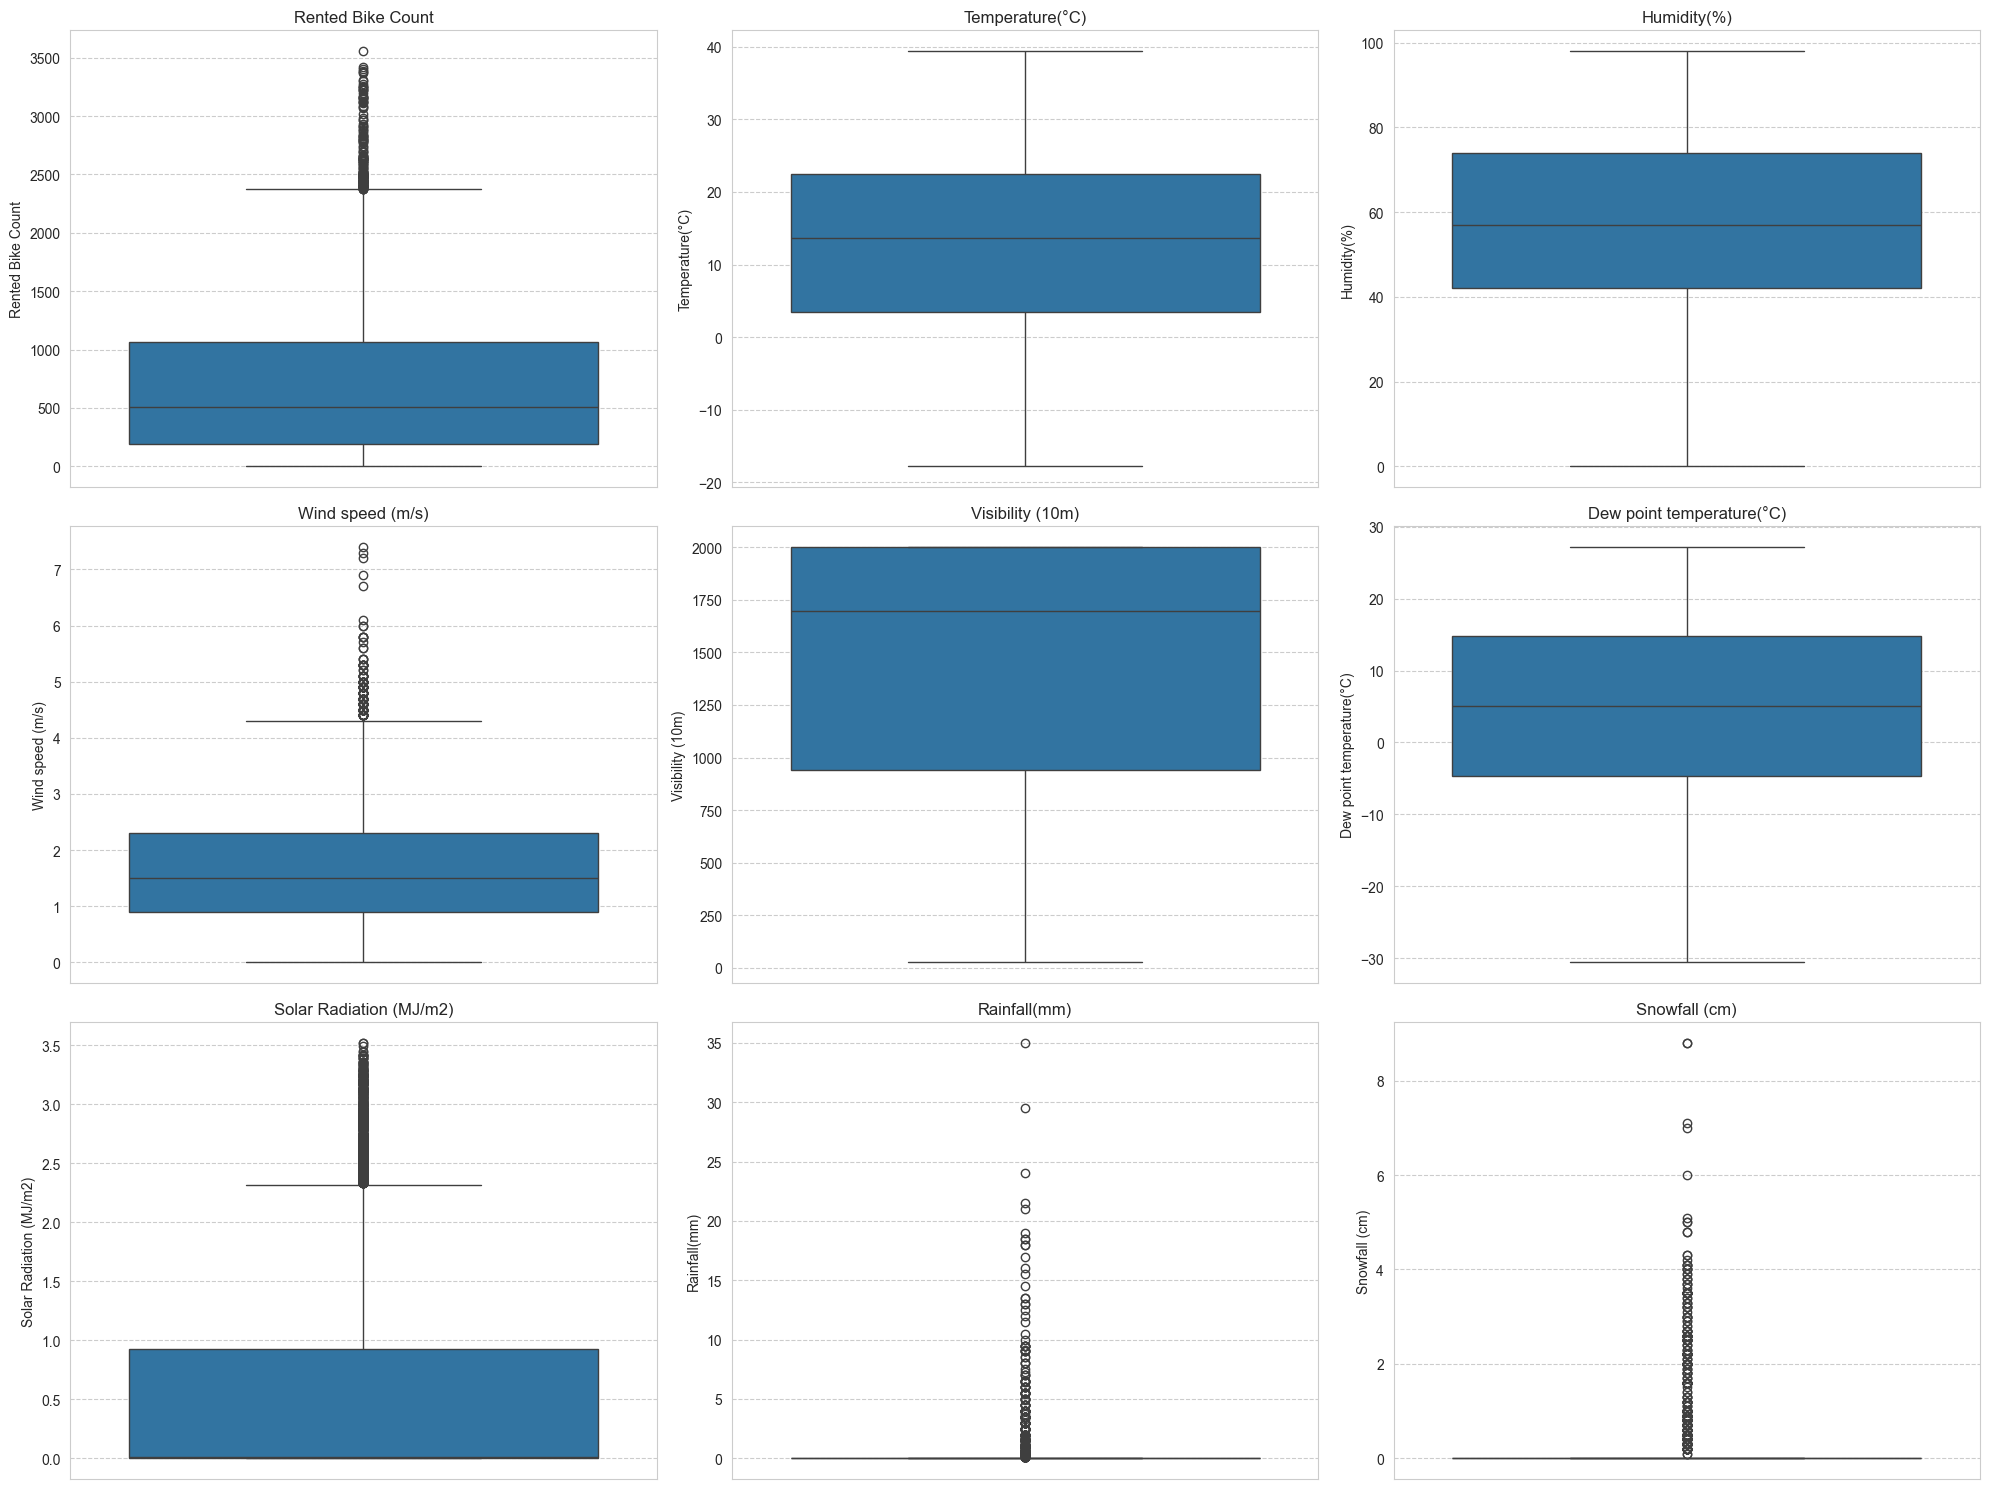

In [22]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

| 변수명                            | 분포 및 특징                               | 이상치 여부                          | 해석                              |
| ------------------------------ | ------------------------------------- | ------------------------------- | ------------------------------- |
| **Rented Bike Count**          | 강한 우측 꼬리(long right tail), 중위수는 약 500 | ✅ 다수 이상치 존재 (2000 이상)           | 인기 시간대에서 폭증하는 수요 존재 가능성 (출퇴근 등) |
| **Temperature (°C)**           | 적절한 범위 (약 -15°C \~ 35°C), 거의 대칭 분포    | ❌ 이상치 없음                        | 계절성을 잘 반영한 기온                   |
| **Humidity (%)**               | 대체로 대칭, 중간값 약 60%                     | ❌ 이상치 없음                        | 예측에 유용한 습도 정보                   |
| **Wind speed (m/s)**           | 편향 분포, 약 4\~5m/s 이상 값이 이상치로 처리됨       | ✅ 다수 존재                         | 고풍속은 극히 드물며, 실제 이상값 가능성 있음, 2개의 카테고리로 나누는것도 의미있을듯     |
| **Visibility (10m)**           | 2000 근처에 몰려 있음, 일부 낮은 값 존재            | ❌ 이상치 없음 (시각적으로 밀집되어 있지만 정상 범위) | 시정 거리 정보, 낮을수록 나쁨               |
| **Dew point temperature (°C)** | 중간값은 5\~10도, 적절한 범위                   | ❌ 없음                            | 온도와 밀접한 관계, 다중공선성 주의            |
| **Solar Radiation (MJ/m²)**    | 대부분 0에 가까움, 극소수 높은 값 존재               | ✅ 이상치 존재 (3 이상 값)               | 흐린 날이 많고, 맑은 날에만 극단적 값 발생       |
| **Rainfall (mm)**              | 대부분 0, 소수의 큰 값 존재                     | ✅ 존재 (20\~30mm 등)               | 폭우나 장마일 수 있음                    |
| **Snowfall (cm)**              | 대부분 0, 소수의 큰 값 존재                     | ✅ 존재 (5\~8cm 이상)                | 겨울철 특이 이벤트 가능성 있음               |


### Categorical feature 분석

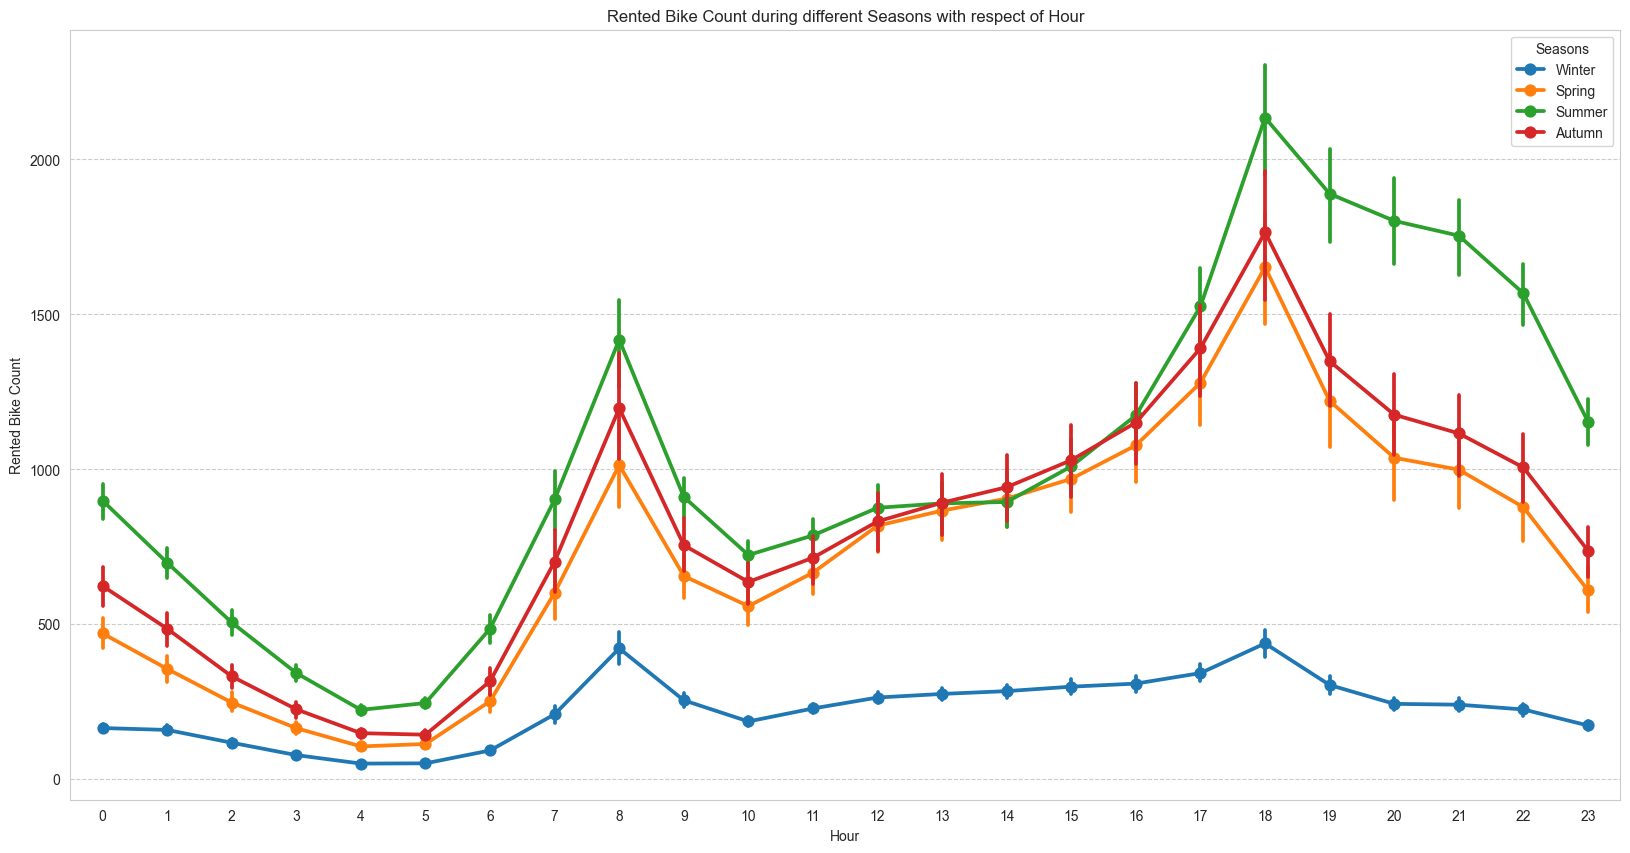

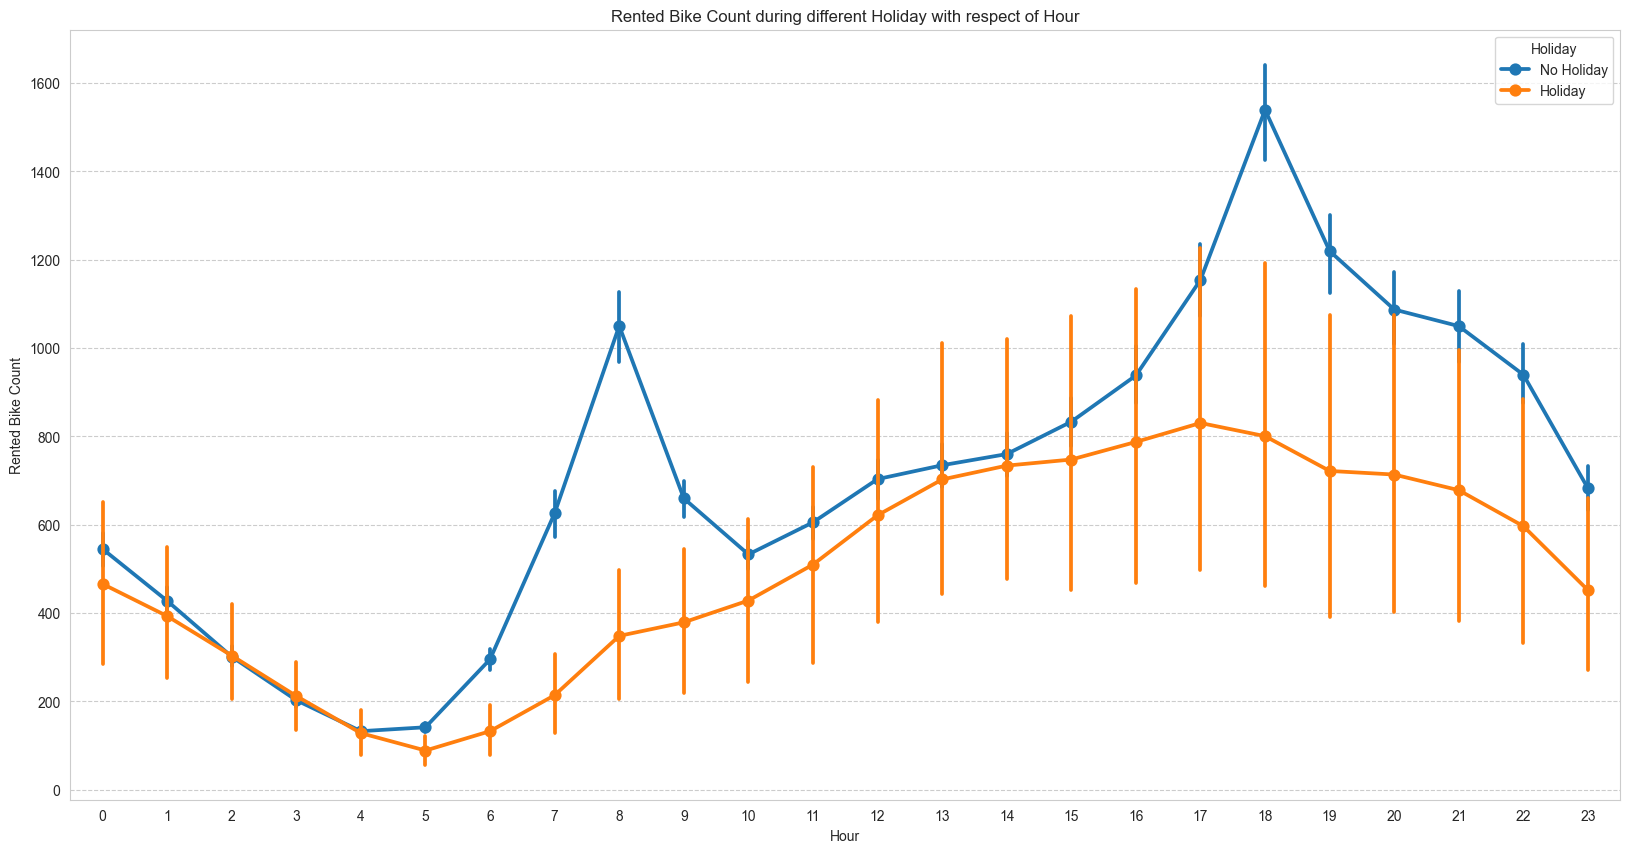

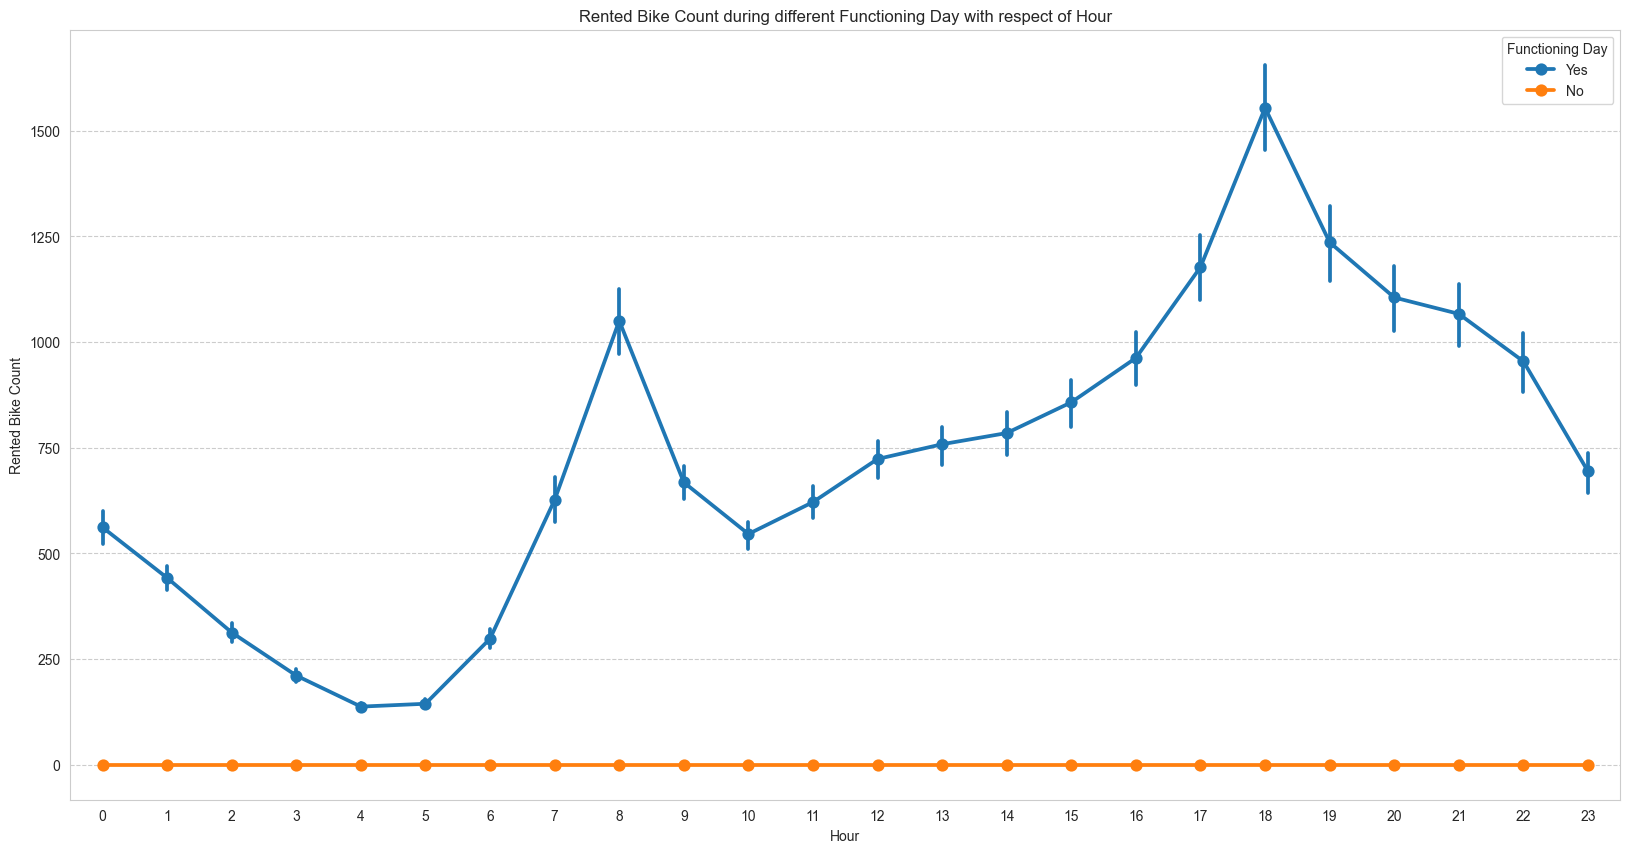

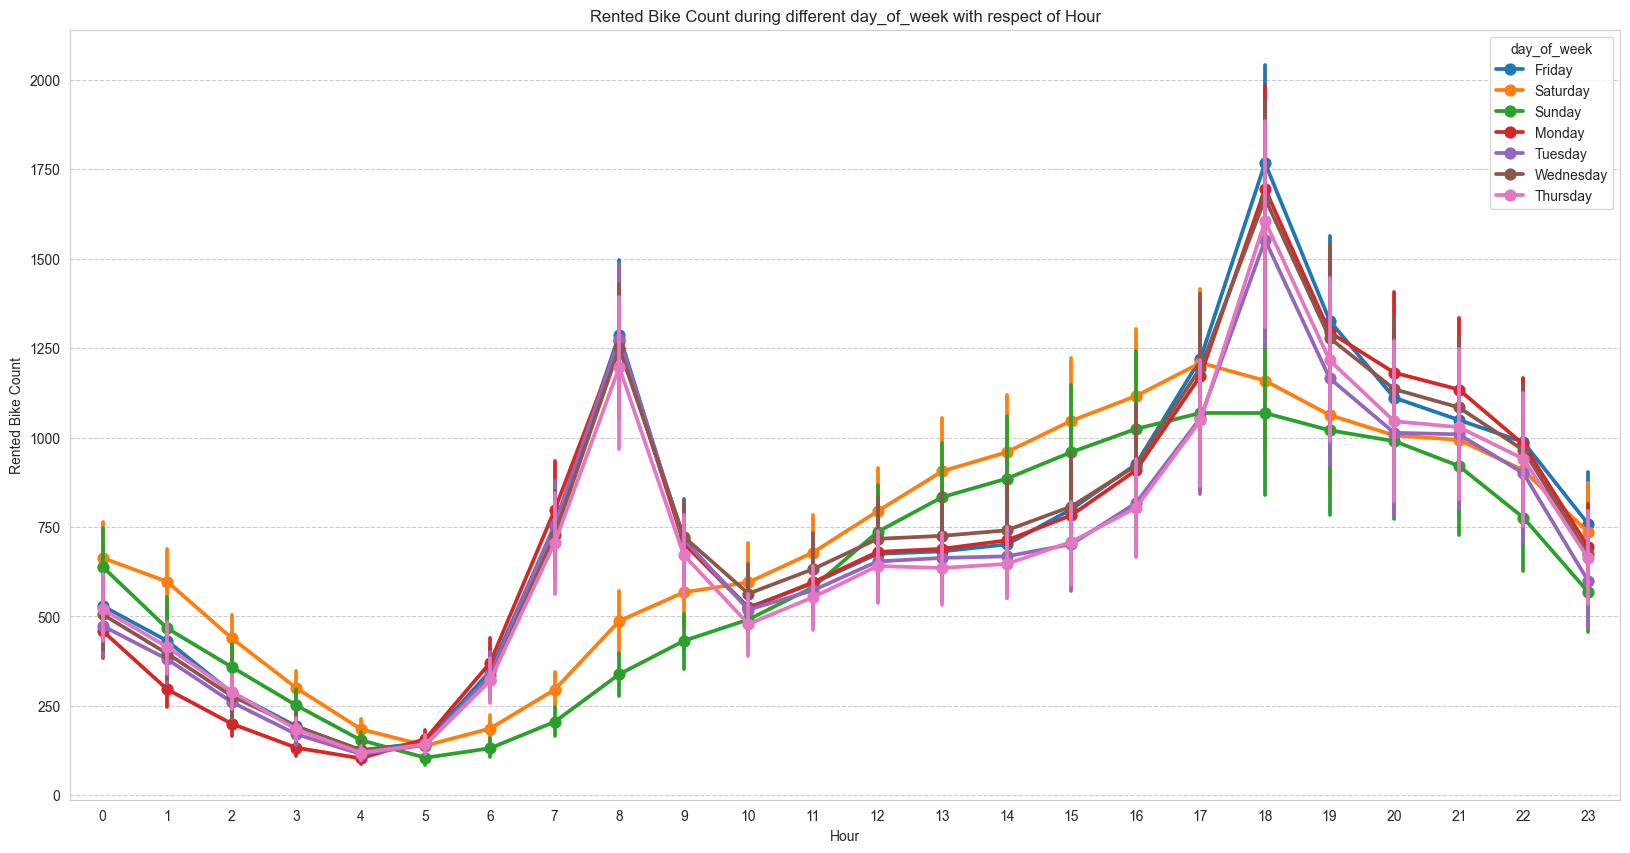

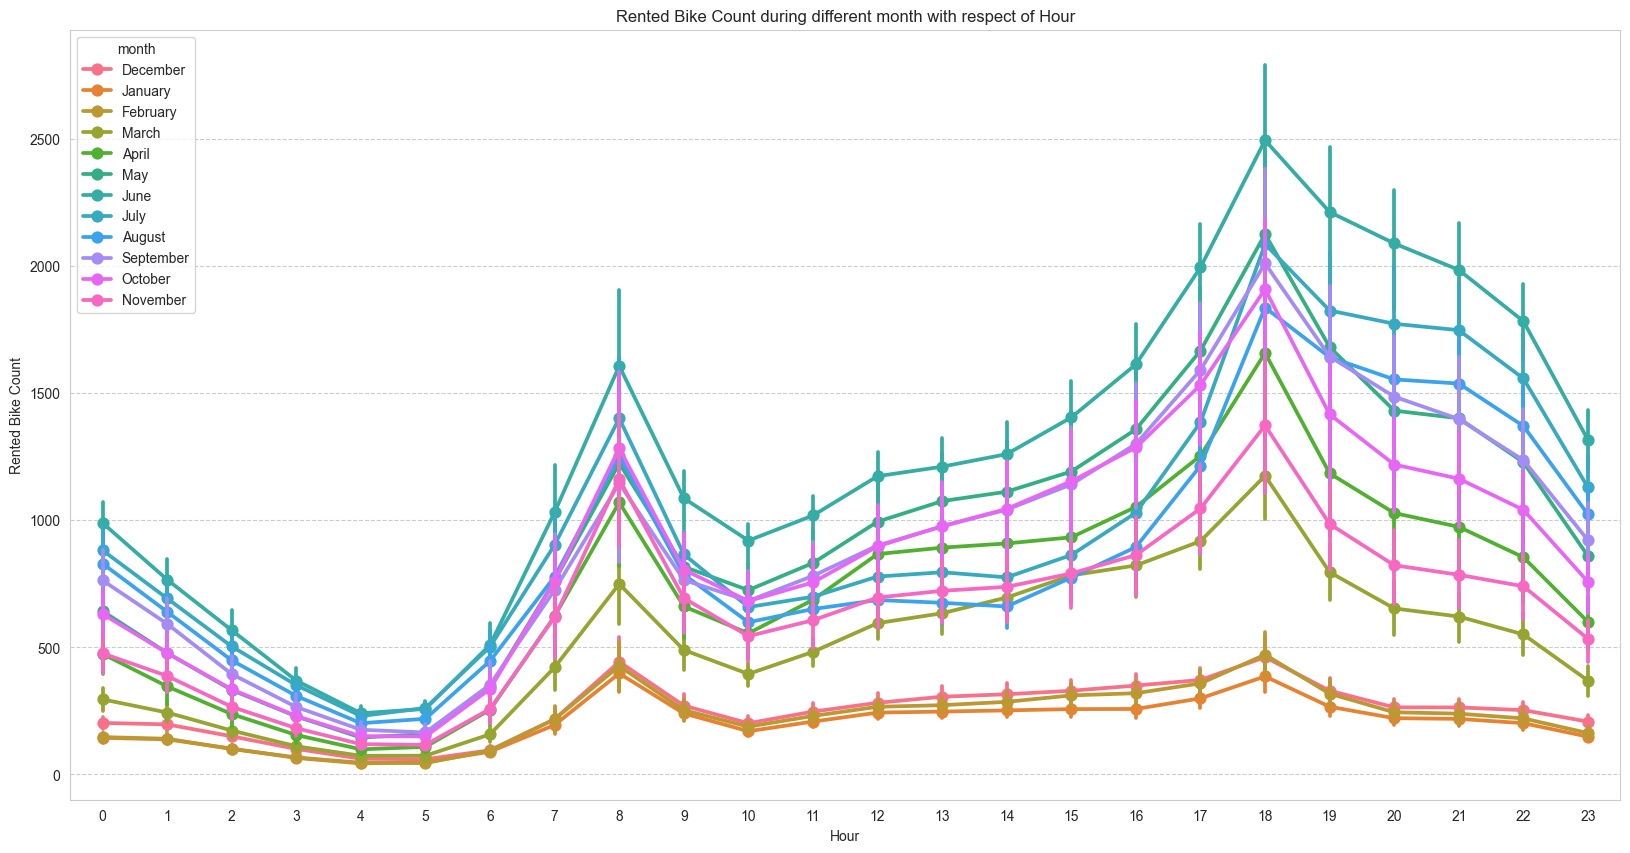

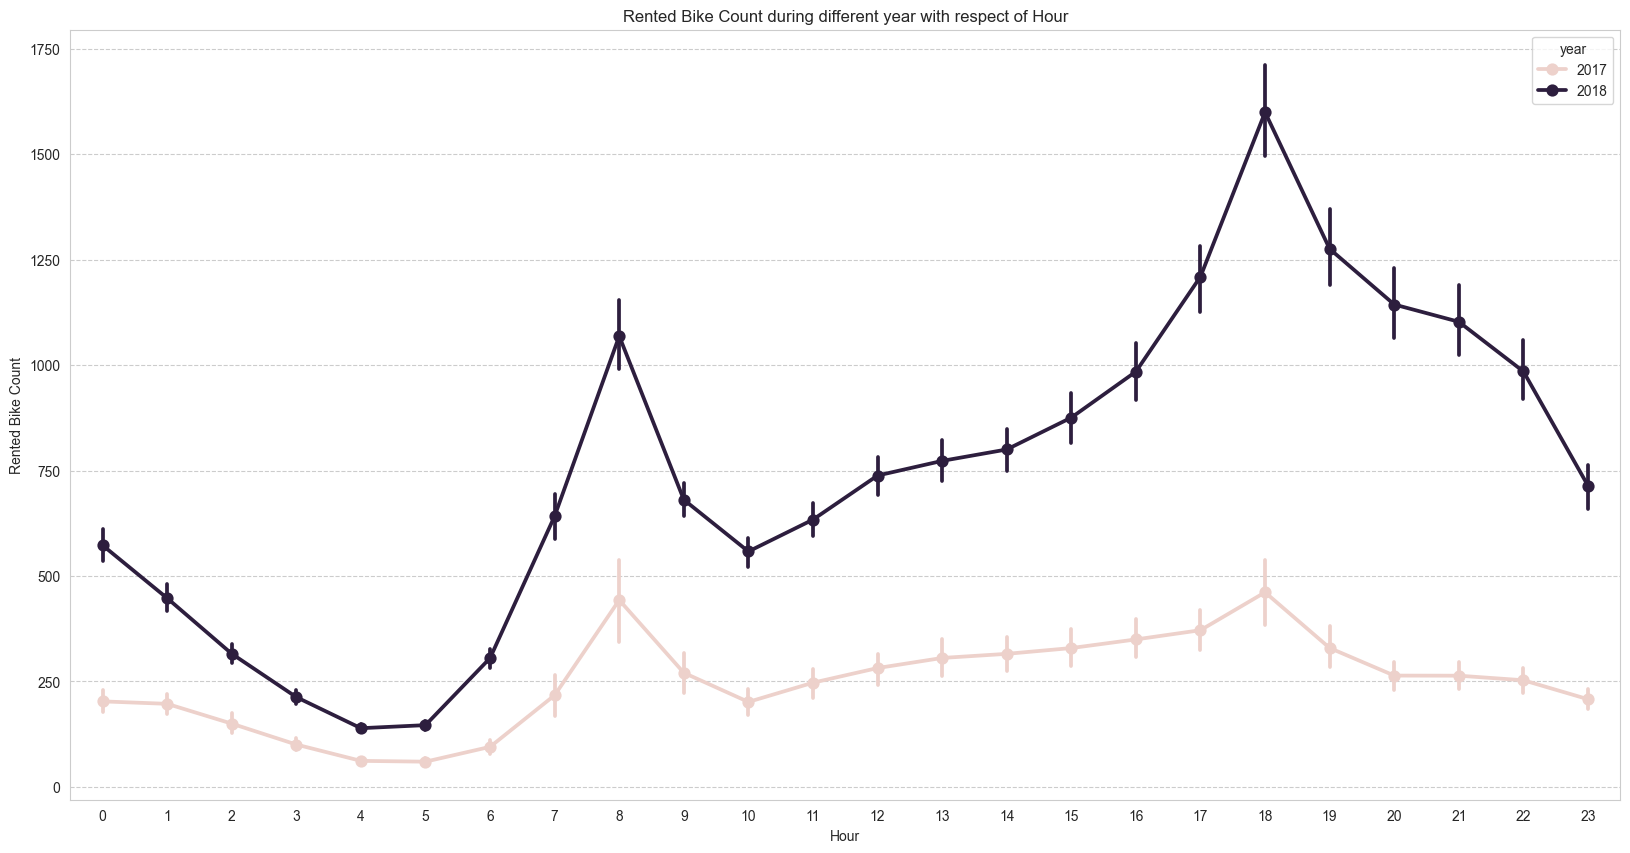

In [23]:
#point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

EDA for cat results

#### Season 
In the season column, demand is low at winter, others are seems similar. 

#### Holiday
During holiday the demand is lower than non-holiday, 
It's seems like many people use bike for going work

#### Functioning Day
If it is  no Functioning Day then there is no demand -> 당연
So, we need to delete no functioning date for the column(it can't be the feature)

#### Days of week
평일(Mon–Fri): 출퇴근 피크 (08시, 18시)가 선명함
주말(Sat, Sun): 피크가 낮고 오후 시간대(13~17시)에 고르게 분포
금요일(Fri)은 퇴근 후 대여량이 다른 평일보다 더 높음
→ 요일은 대여 목적을 구분할 수 있는 중요한 변수 (출근/레저) + 주말로 따로 분류하는것도 가능할듯

#### month 
In the month column, We can clearly see that the demand is low in December January & Febuary. 
Beacause it is winter season. Month and season seems like they have similar info

#### year
the demand of 2018 get bigger

In [24]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [25]:
# value counts of Week column
df.week.value_counts()

week
Weekdays    6264
Weekend     2496
Name: count, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

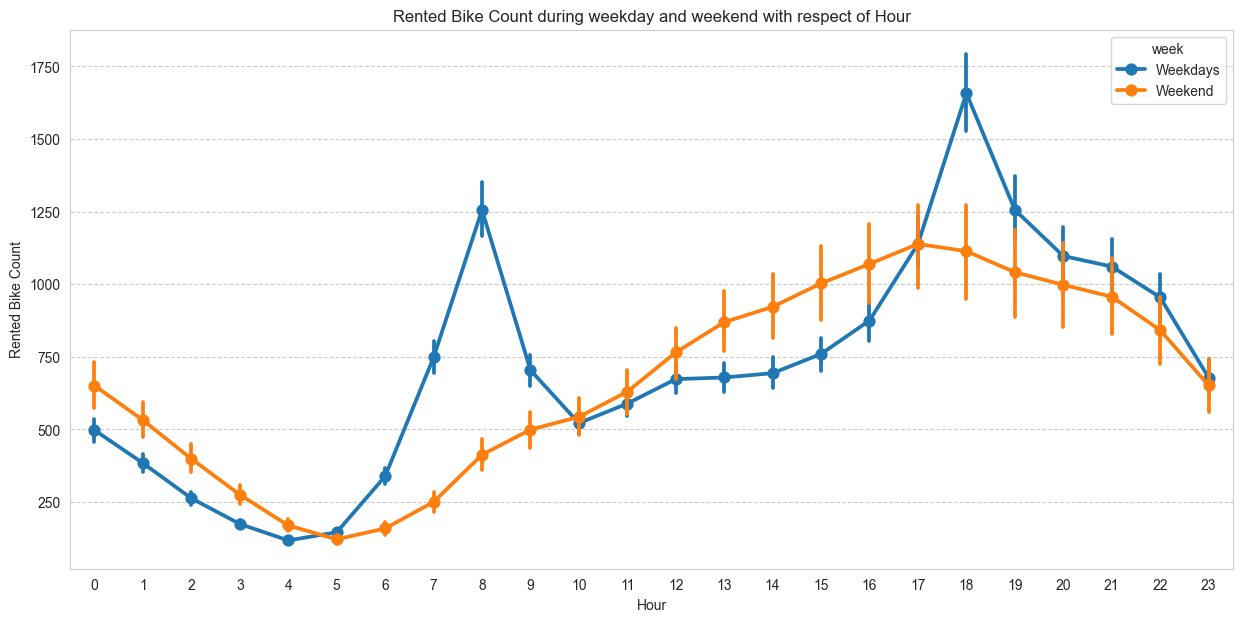

In [26]:
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

In [27]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

weekend에서 뚜렷한 차이 확인가능

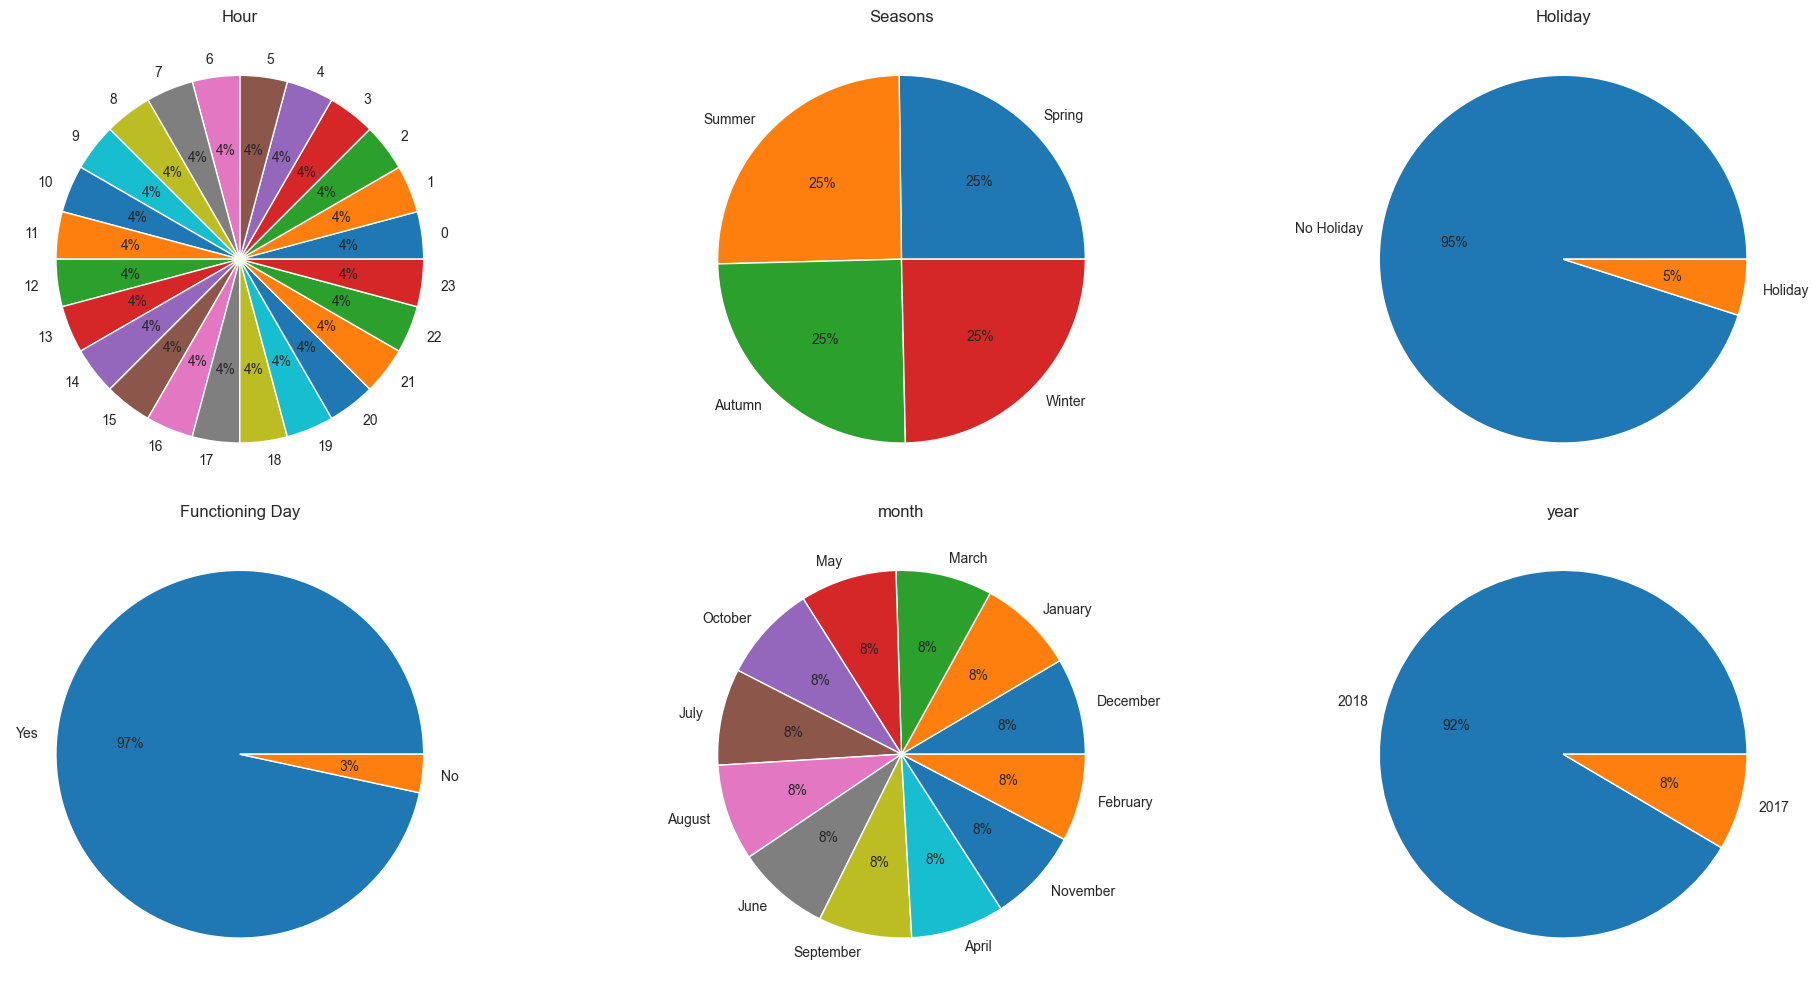

In [28]:
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

데이터 분포 상 Holiday와 year데이터는 중요데이터로 보임

## Skewness 


============================== Rented Bike Count ==============================



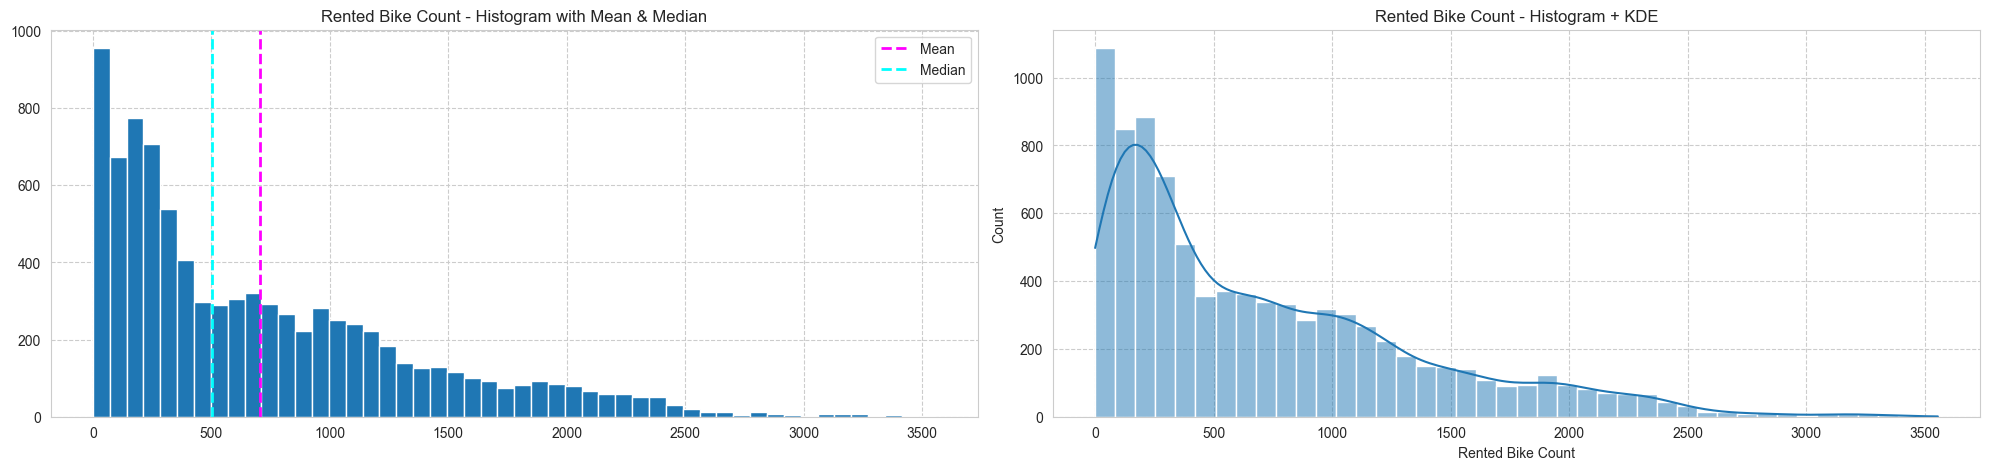


============================== Temperature(°C) ==============================



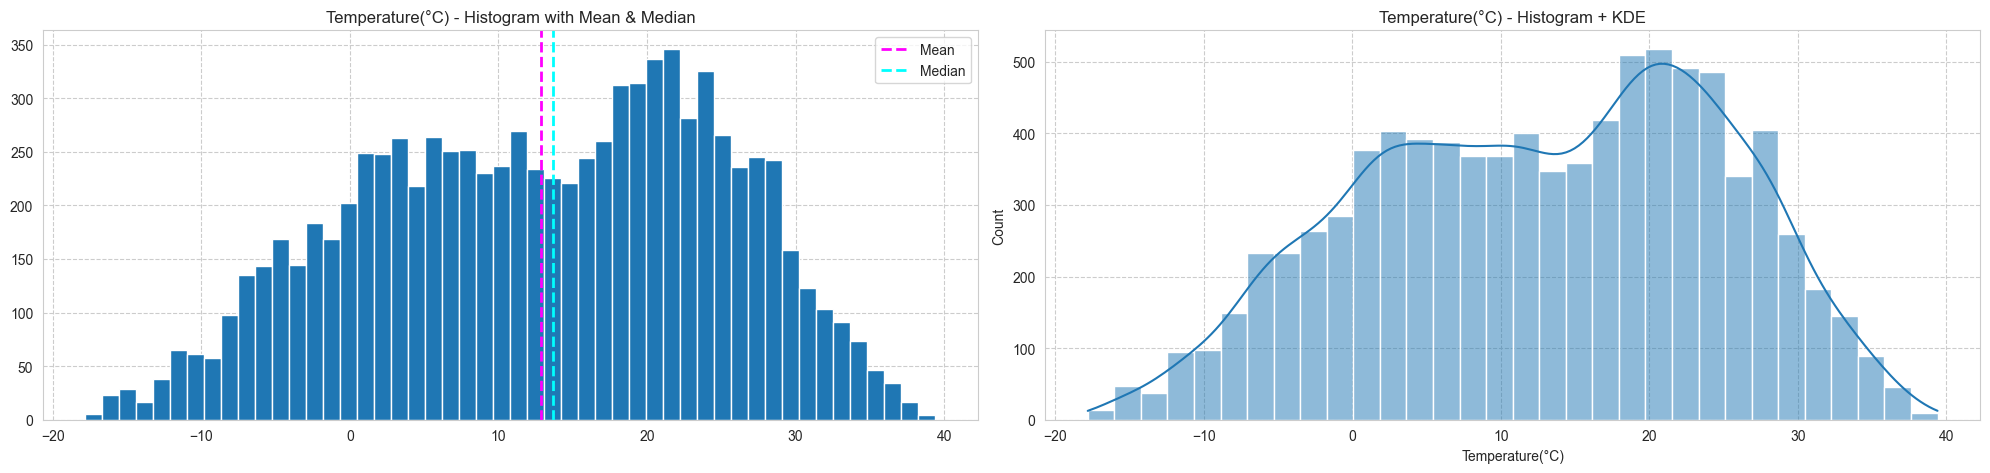


============================== Humidity(%) ==============================



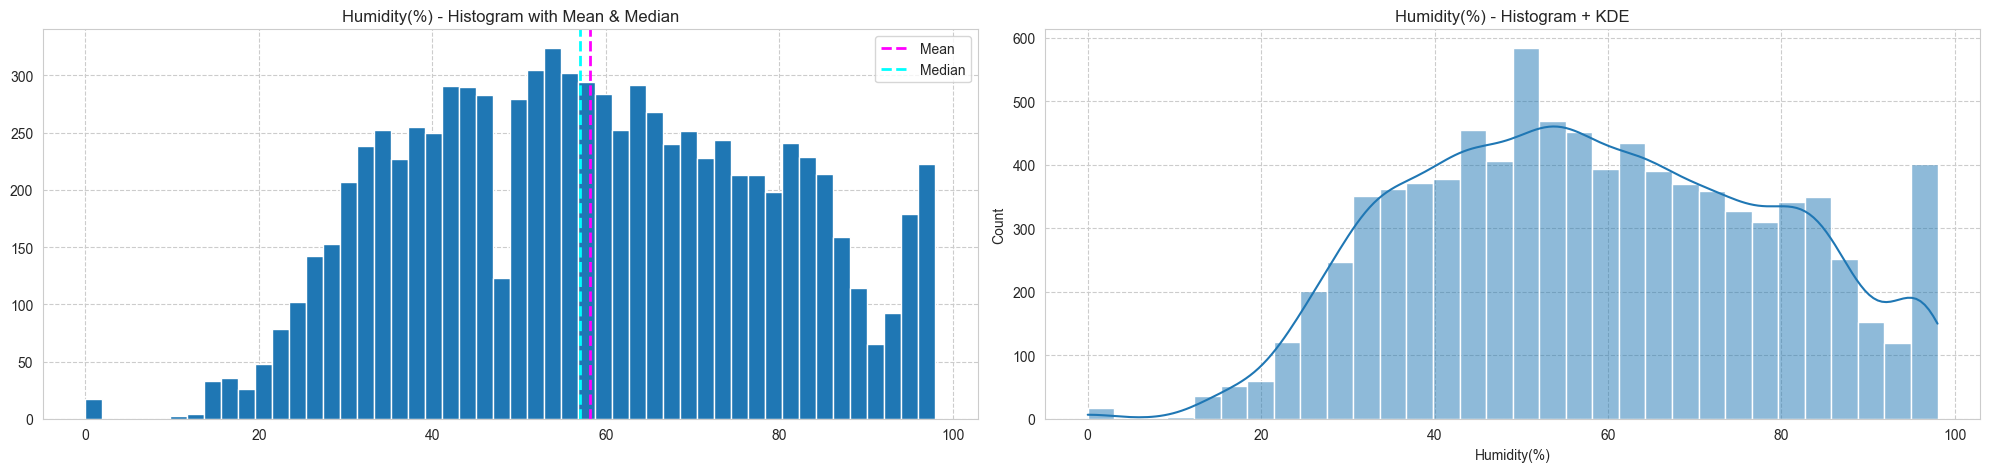


============================== Wind speed (m/s) ==============================



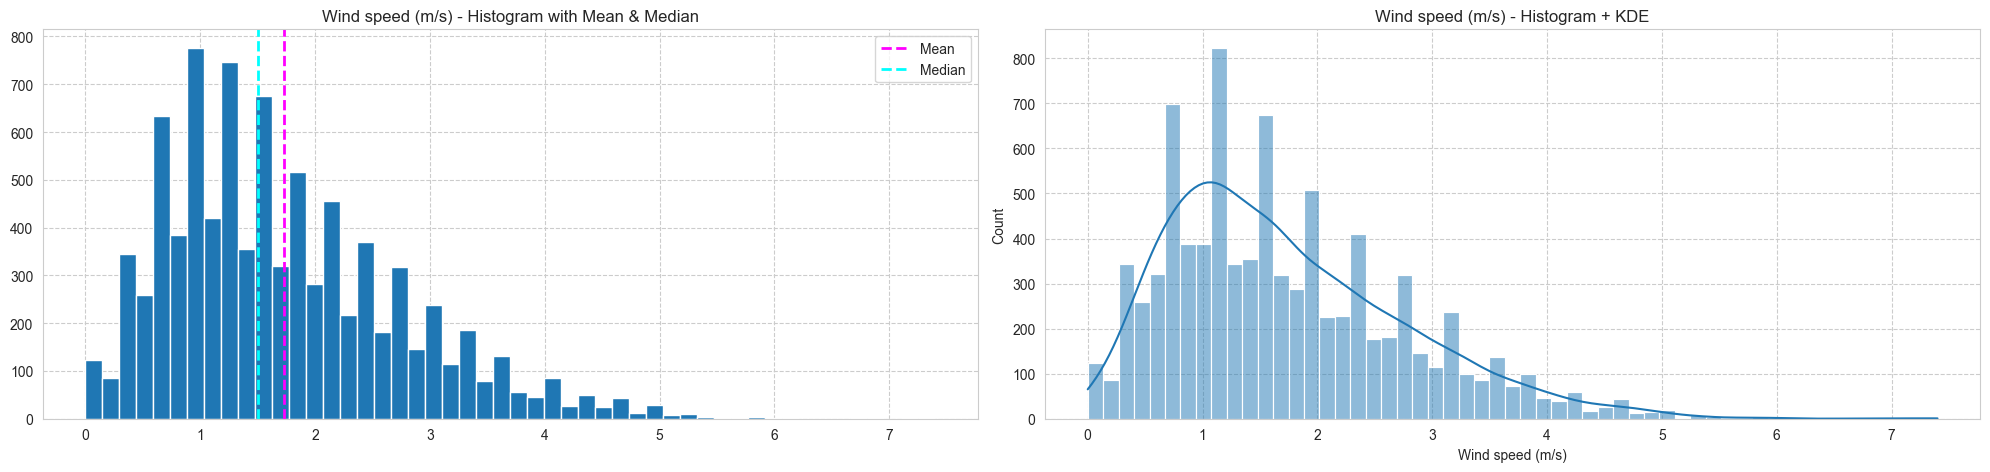


============================== Visibility (10m) ==============================



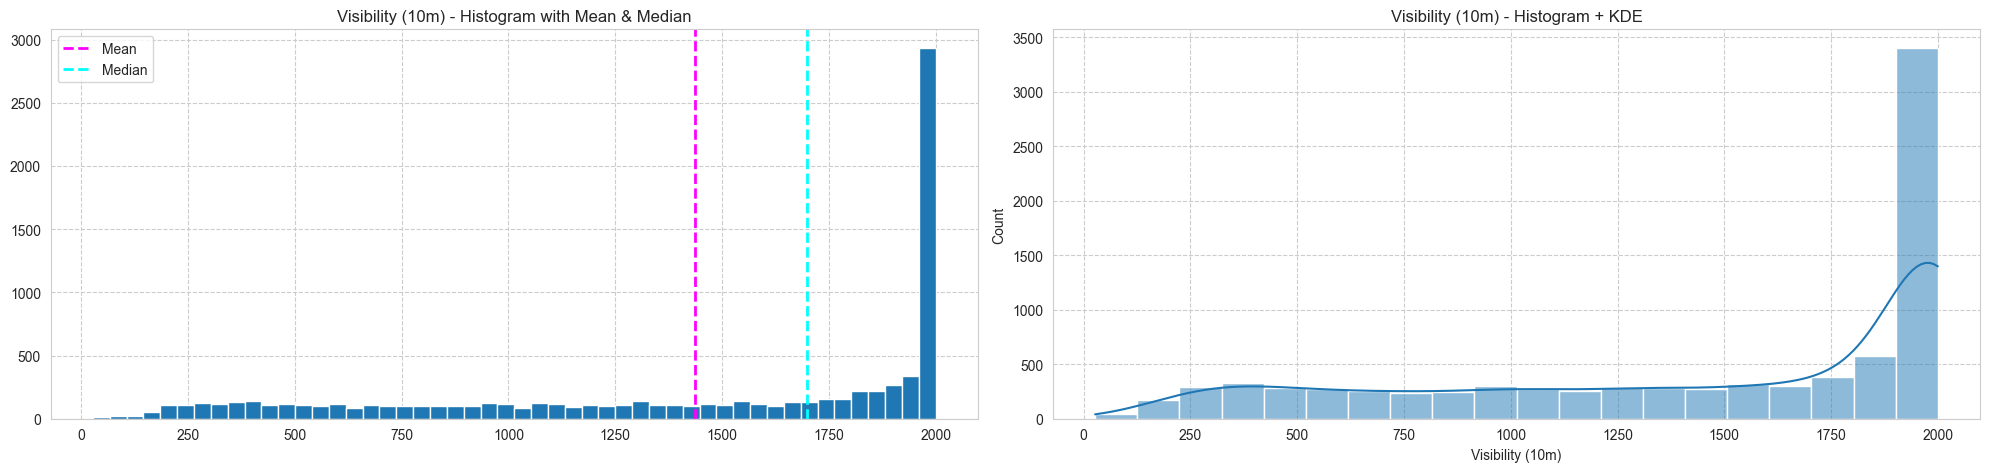


============================== Dew point temperature(°C) ==============================



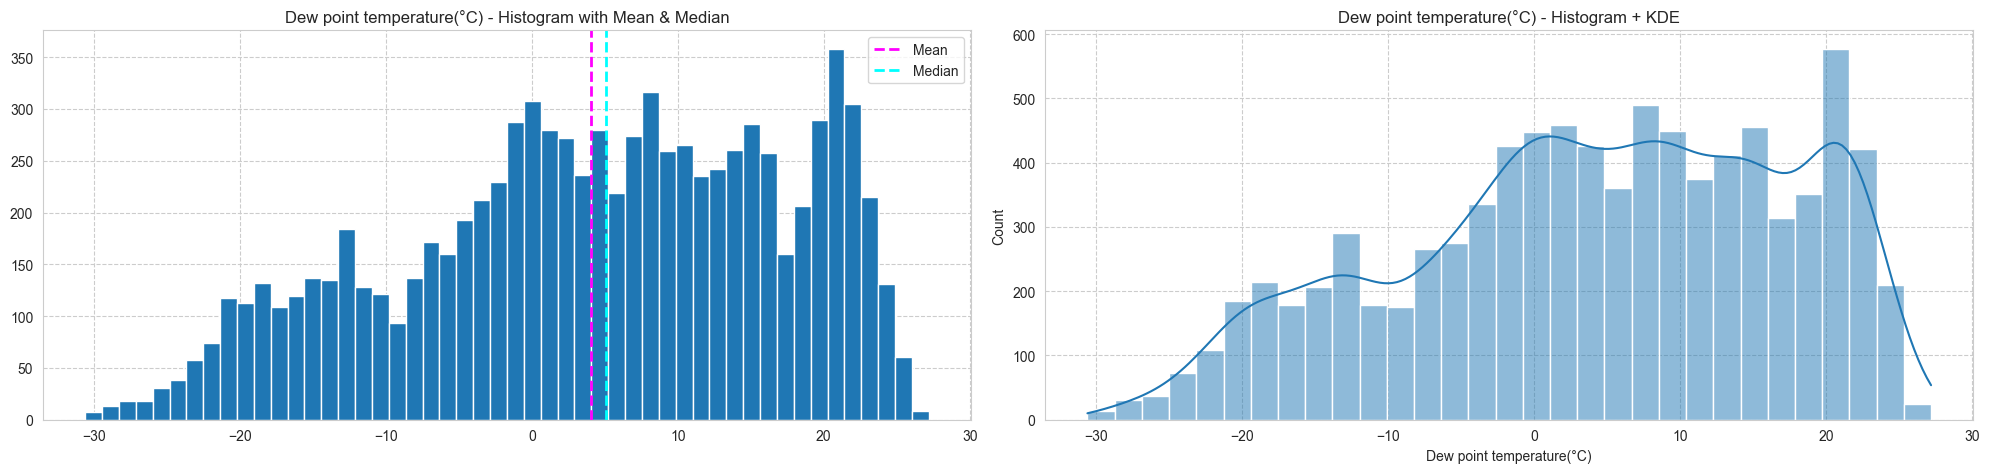


============================== Solar Radiation (MJ/m2) ==============================



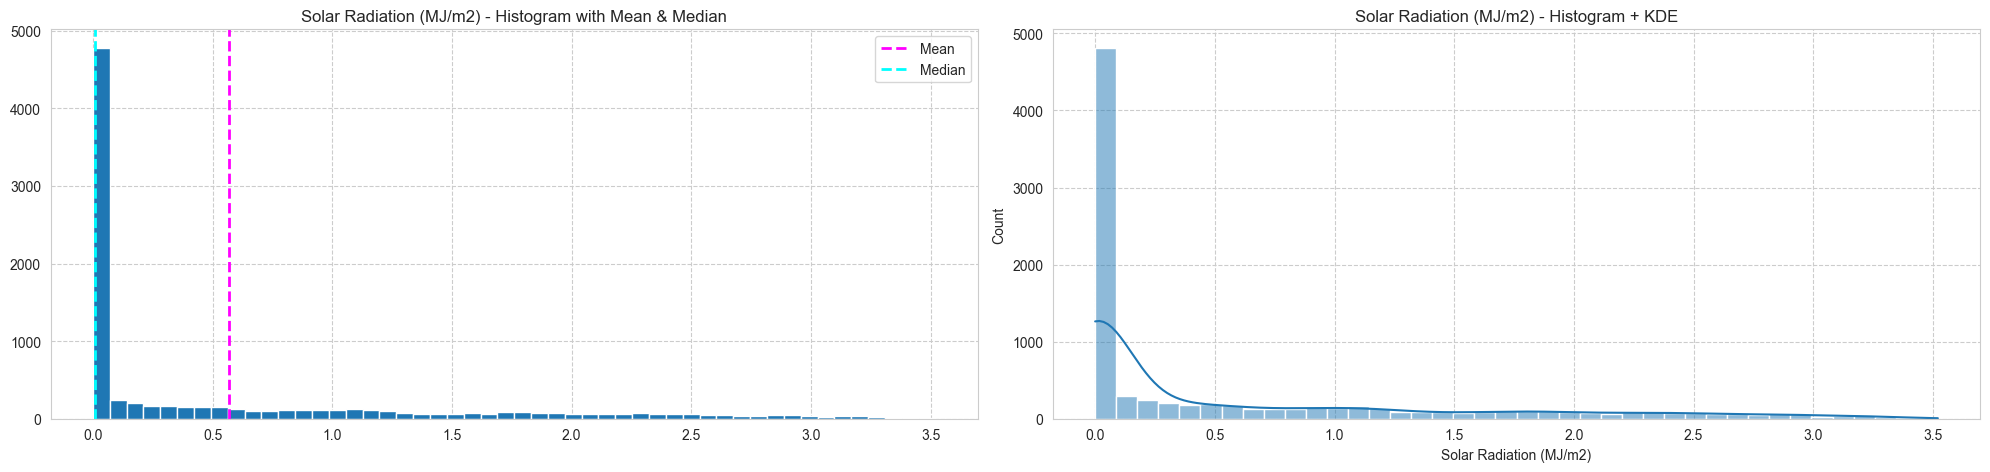


============================== Rainfall(mm) ==============================



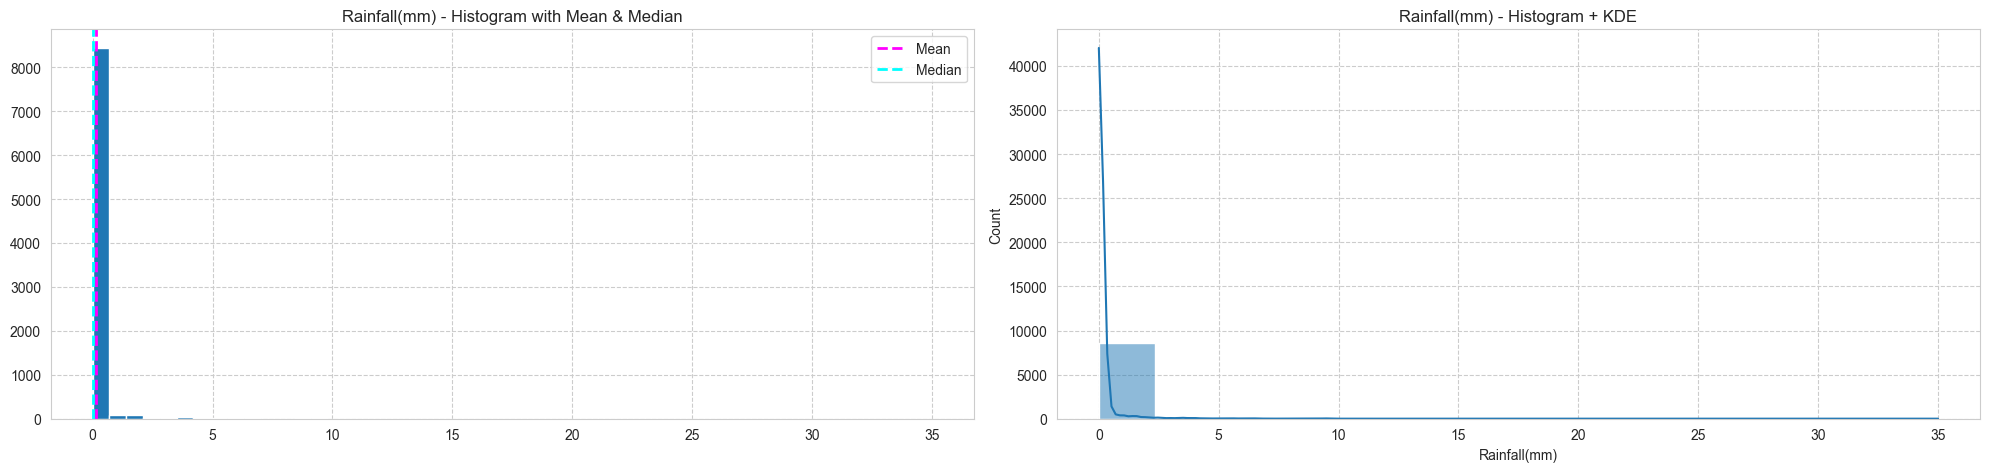


============================== Snowfall (cm) ==============================



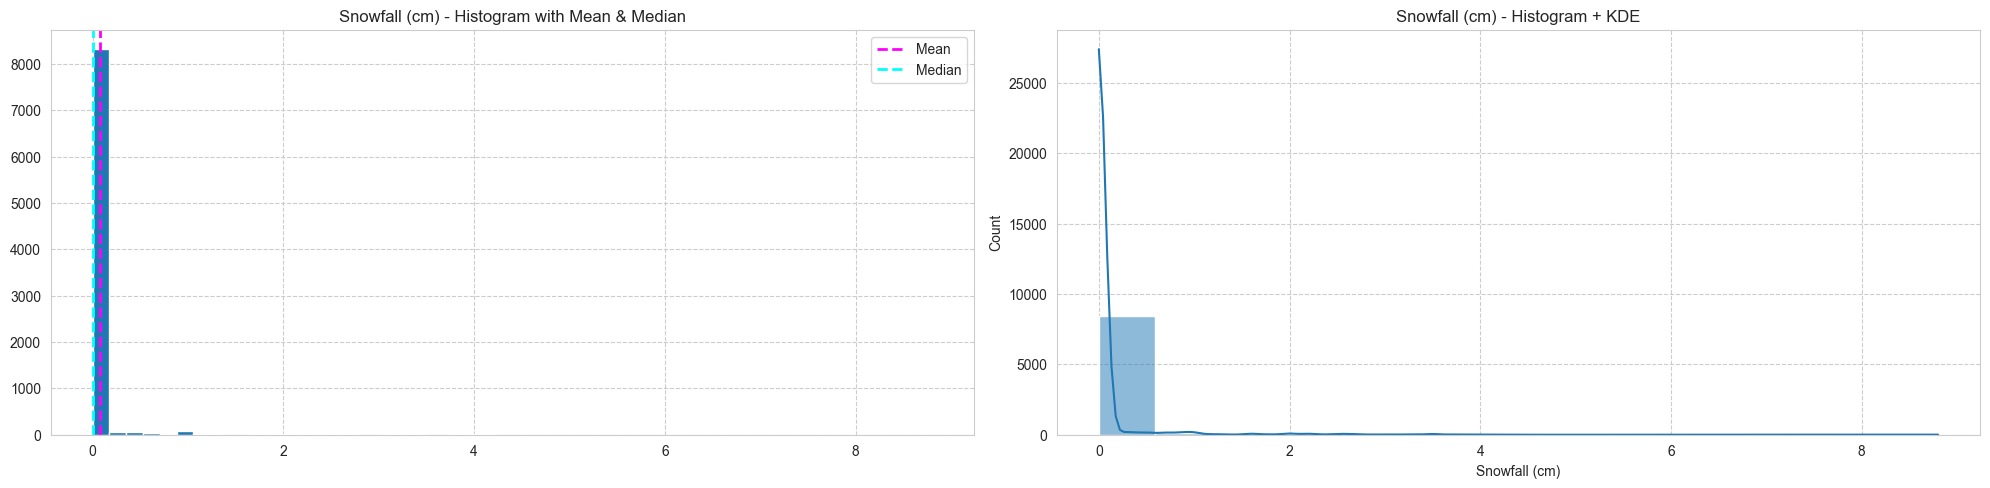

In [29]:
n = 1
for i in numeric_features.columns:
    plt.figure(figsize=(20, 40))

    # Histogram + 평균/중앙값 선
    plt.subplot(9, 2, n)
    n += 1
    print('\n' + '='*30 + f' {i} ' + '='*30 + '\n')
    feature = df[i]
    feature.hist(bins=50)
    plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    plt.title(f'{i} - Histogram with Mean & Median')
    plt.legend()

    # Histogram + KDE using seaborn.histplot
    plt.subplot(9, 2, n)
    n += 1
    sns.histplot(df[i], kde=True)
    plt.title(f'{i} - Histogram + KDE')

    plt.tight_layout()
    plt.show()


#### Skewness 분석
##### Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),
##### Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)

### 상관관계분석

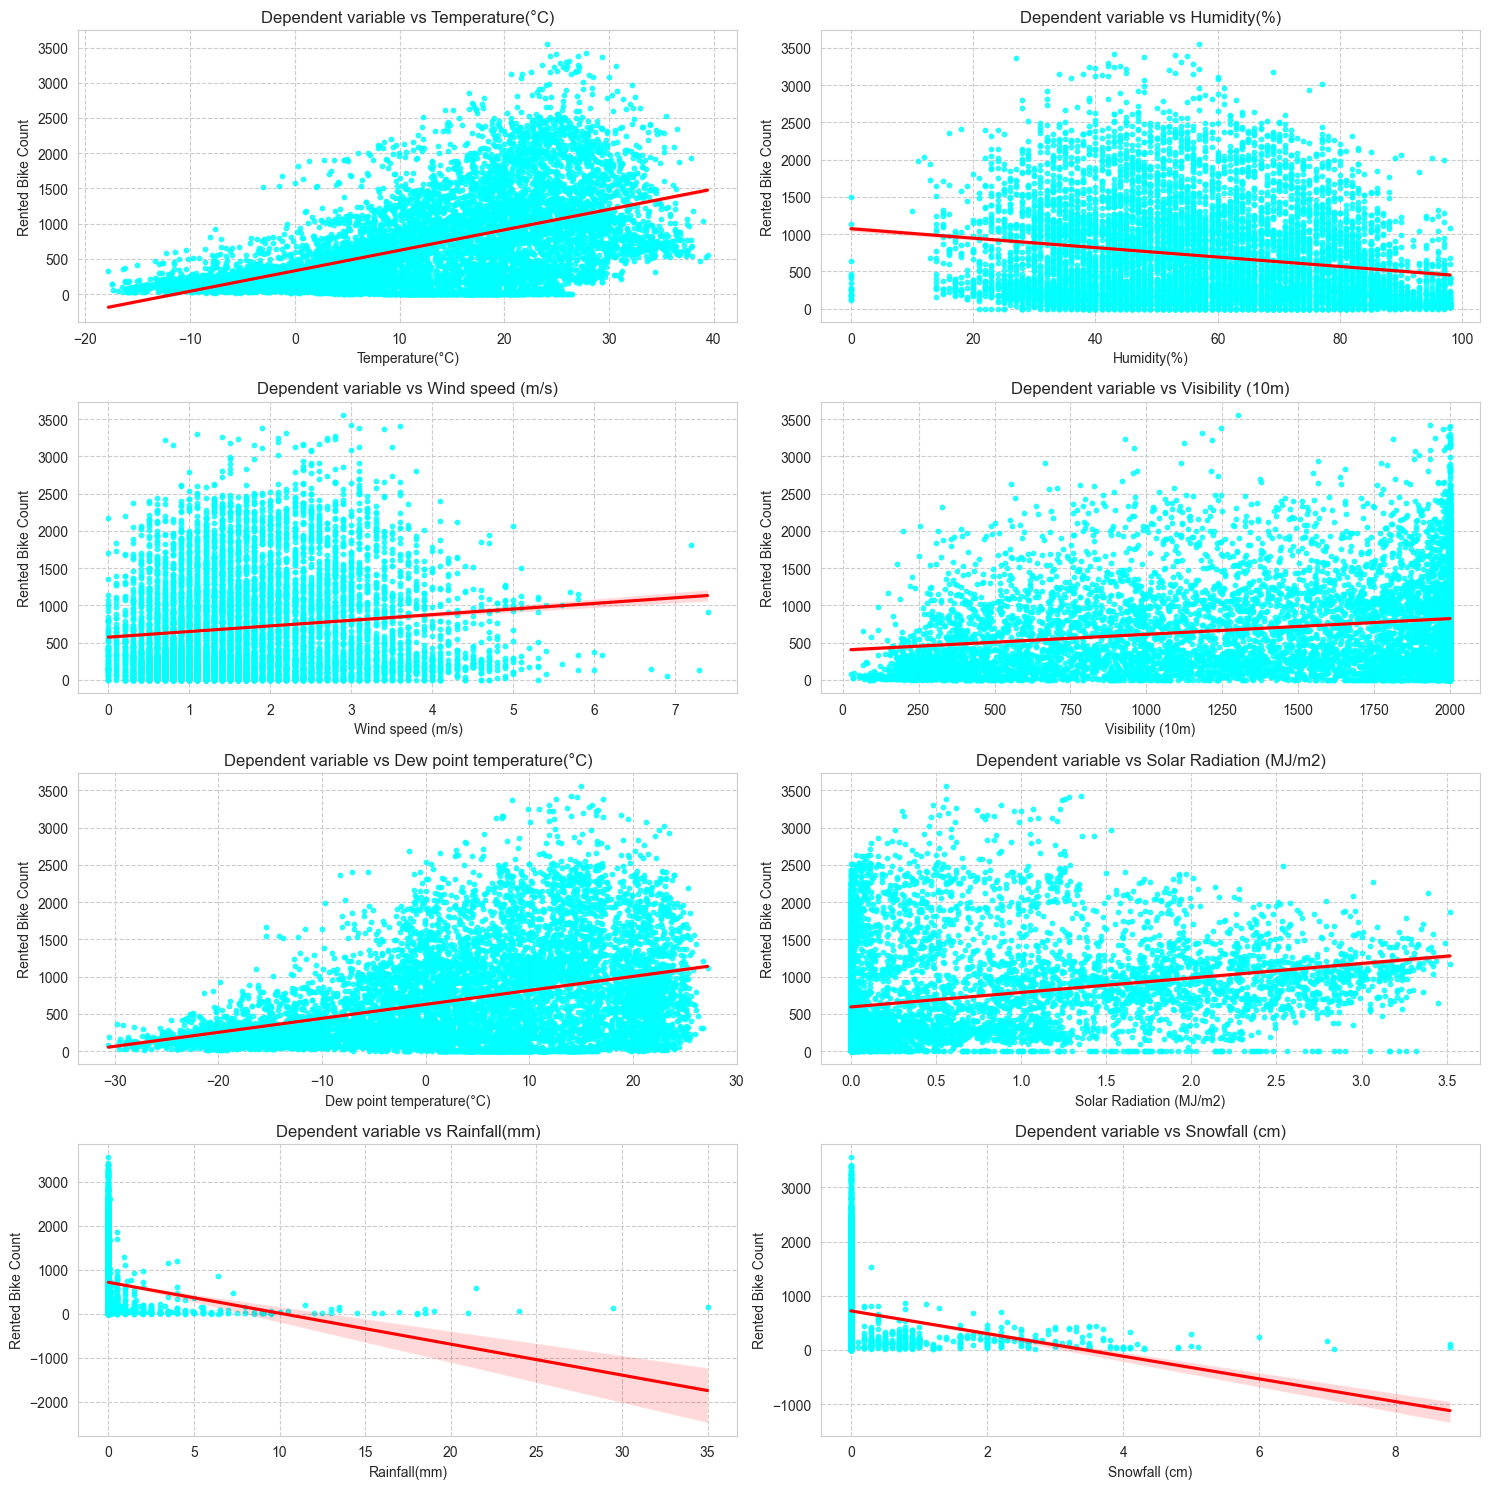

In [30]:
n = 1
plt.figure(figsize=(15, 15))
for i in numeric_features.columns:
    if i != 'Rented Bike Count':
        plt.subplot(4, 2, n)
        sns.regplot(x=df[i], y=df['Rented Bike Count'],
                    scatter_kws={"color": "cyan", "s": 10},
                    line_kws={"color": "red"})
        plt.title(f'Dependent variable vs {i}')
        plt.xlabel(i)
        plt.ylabel('Rented Bike Count')
        n += 1

plt.tight_layout()
plt.show()

In [31]:
# Correlation with Rented Bike Count
numeric_features.corr()['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

<Axes: >

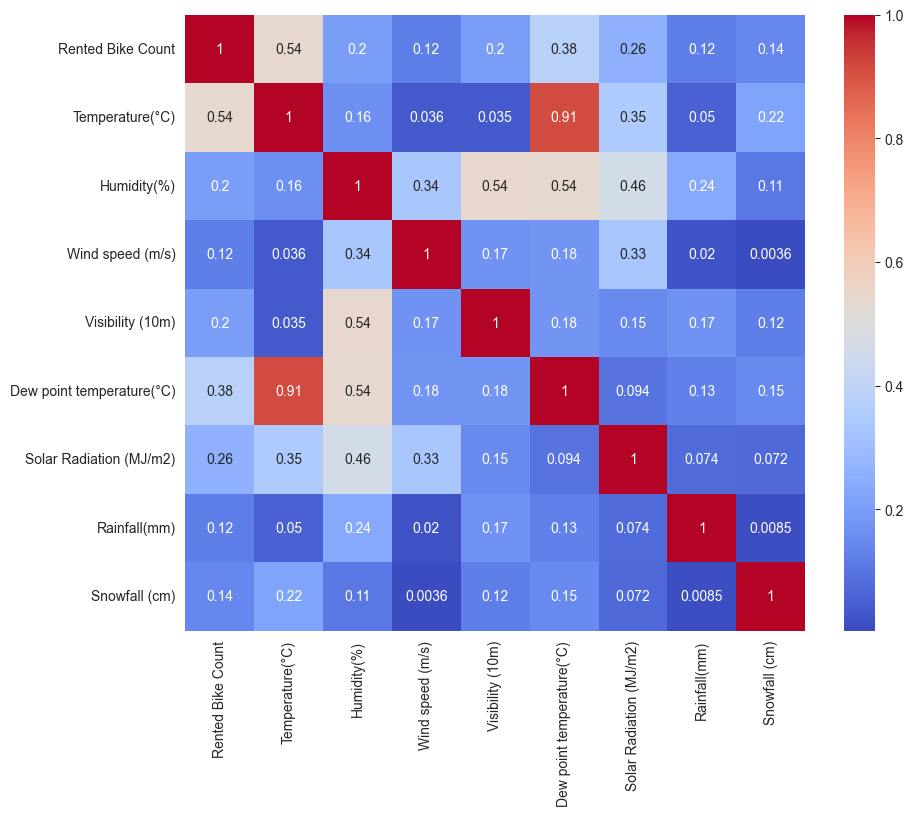

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(abs(numeric_features.corr()),
            cmap='coolwarm', annot=True)

Dew point temp와 temp는 매우 큰 corr확인 -> 해결필요

#### Handling Multicollinearity

In [33]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(numeric_features.drop(columns='Rented Bike Count'))
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                index=X.columns)
print(vif)

const                        394.818571
Temperature(°C)               86.645176
Humidity(%)                   20.322769
Wind speed (m/s)               1.202305
Visibility (10m)               1.555524
Dew point temperature(°C)    115.474242
Solar Radiation (MJ/m2)        1.981945
Rainfall(mm)                   1.081664
Snowfall (cm)                  1.092882
dtype: float64


In [35]:
X_reduced = numeric_features.drop(columns=['Rented Bike Count', 'Dew point temperature(°C)'])
X_reduced = add_constant(X_reduced)

vif_reduced = pd.Series(
    [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])],
    index=X_reduced.columns
)
print(vif_reduced)


const                      47.367997
Temperature(°C)             1.543508
Humidity(%)                 2.388271
Wind speed (m/s)            1.199073
Visibility (10m)            1.544104
Solar Radiation (MJ/m2)     1.890727
Rainfall(mm)                1.067180
Snowfall (cm)               1.087586
dtype: float64


dew_point는 제거해야함

In [36]:
df = data.copy()

In [37]:
df.drop(columns=['Dew point temperature(°C)'], inplace=True)

In [38]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   
3               0.9              2000                      0.0           0.0   
4               2.3              2000                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday Functioning Day  
0            0.0  Winter  No Holiday             Yes  
1            0.0  Winter  No Holiday             Yes  
2            0.0  Winter  No Holiday             Yes  
3            0.0  Winter  No Holiday             Yes  
4            0.0  Winter  No Holiday             Yes

In [39]:
# Encoding categorical features
# One hot encoding for categorical features
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

## Controlling Skewness

#### Right Skewed
- Rented Bike Count
- Wind speed (m/s),
- Solar Radiation (MJ/m2) -> bining looks good
- Rainfall(mm),-> bining looks good
- Snowfall (cm),-> bining looks good
##### Left skewed columns are
- Visibility (10m) -> bining looks good
- Dew point temperature(°C)

Text(0.5, 1.0, 'Square root')

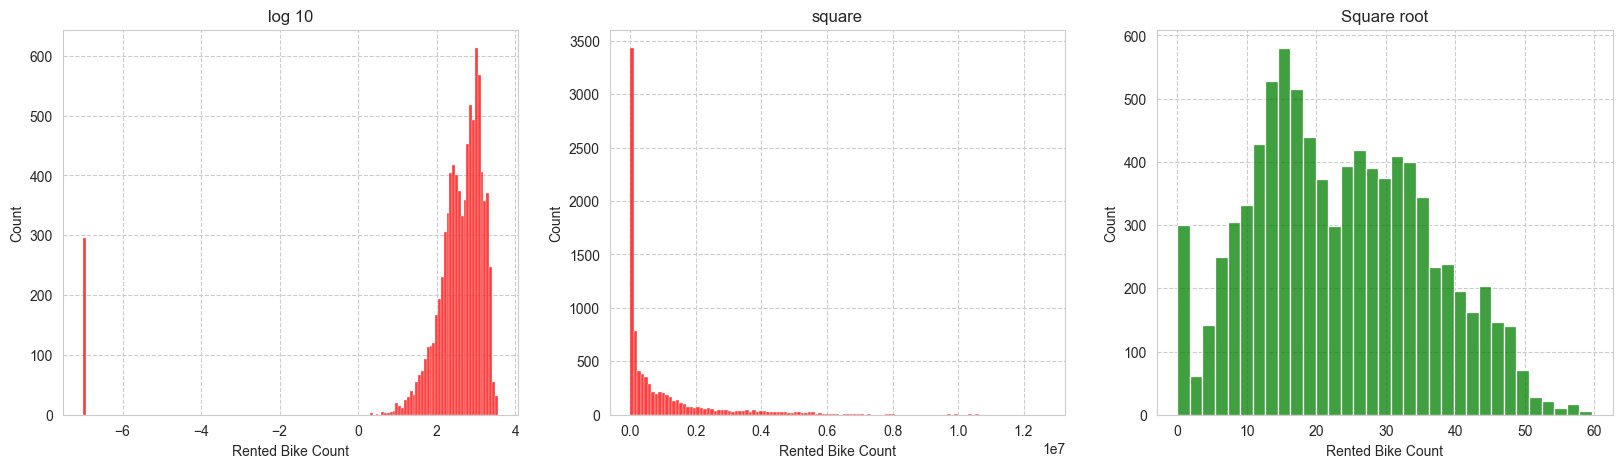

In [40]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
#log10 
sns.histplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
#square 
sns.histplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
#square root 
sns.histplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

Text(0.5, 1.0, 'Square root')

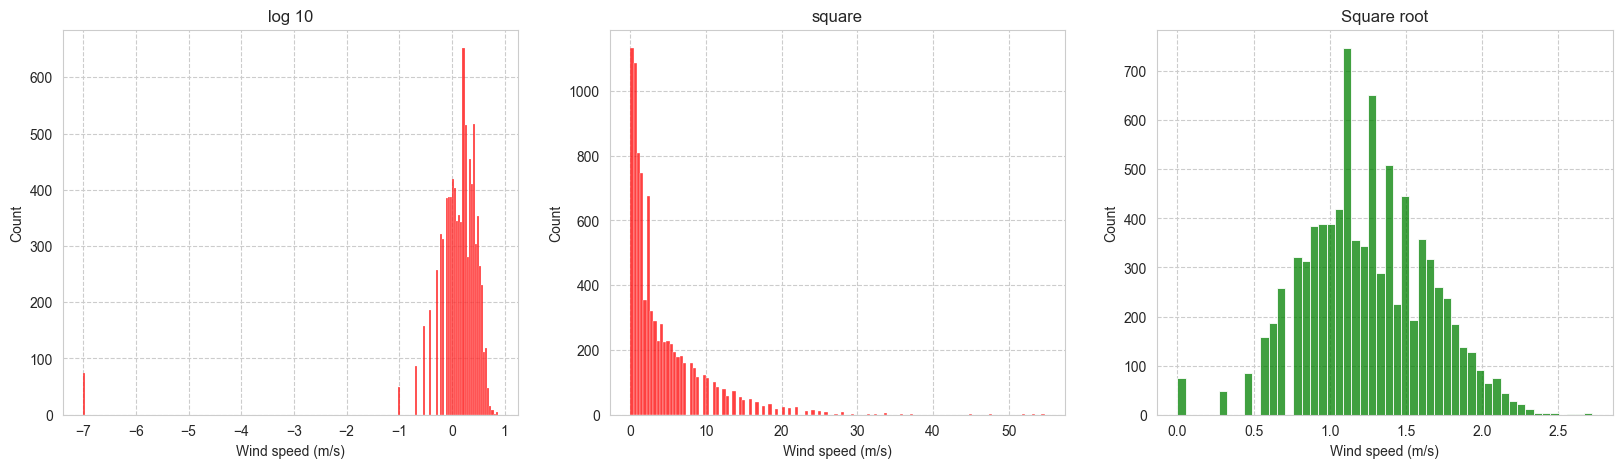

In [41]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
#log10 
sns.histplot(np.log10(new_df['Wind speed (m/s)']+0.0000001),ax=axes[0],color='red').set_title("log 10")
#square 
sns.histplot((new_df['Wind speed (m/s)']**2),ax=axes[1],color='red').set_title("square")
#square root 
sns.histplot(np.sqrt(new_df['Wind speed (m/s)']),ax=axes[2], color='green').set_title("Square root")

square root seems good

In [42]:
df['Solar_Radiation_Bin'] = pd.qcut(df['Solar Radiation (MJ/m2)'], q=4, labels=False, duplicates='drop')
df['Rainfall_Bin'] = pd.qcut(df['Rainfall(mm)'], q=4, labels=False, duplicates='drop')
df['Snowfall_Bin'] = pd.qcut(df['Snowfall (cm)'], q=4, labels=False, duplicates='drop')
df['Visibility (10m)_Bin'] = pd.qcut(df['Visibility (10m)'], q=4, labels=False, duplicates='drop')

In [43]:
binned_features = ['Solar_Radiation_Bin', 'Rainfall_Bin', 'Snowfall_Bin', 'Visibility (10m)_Bin']

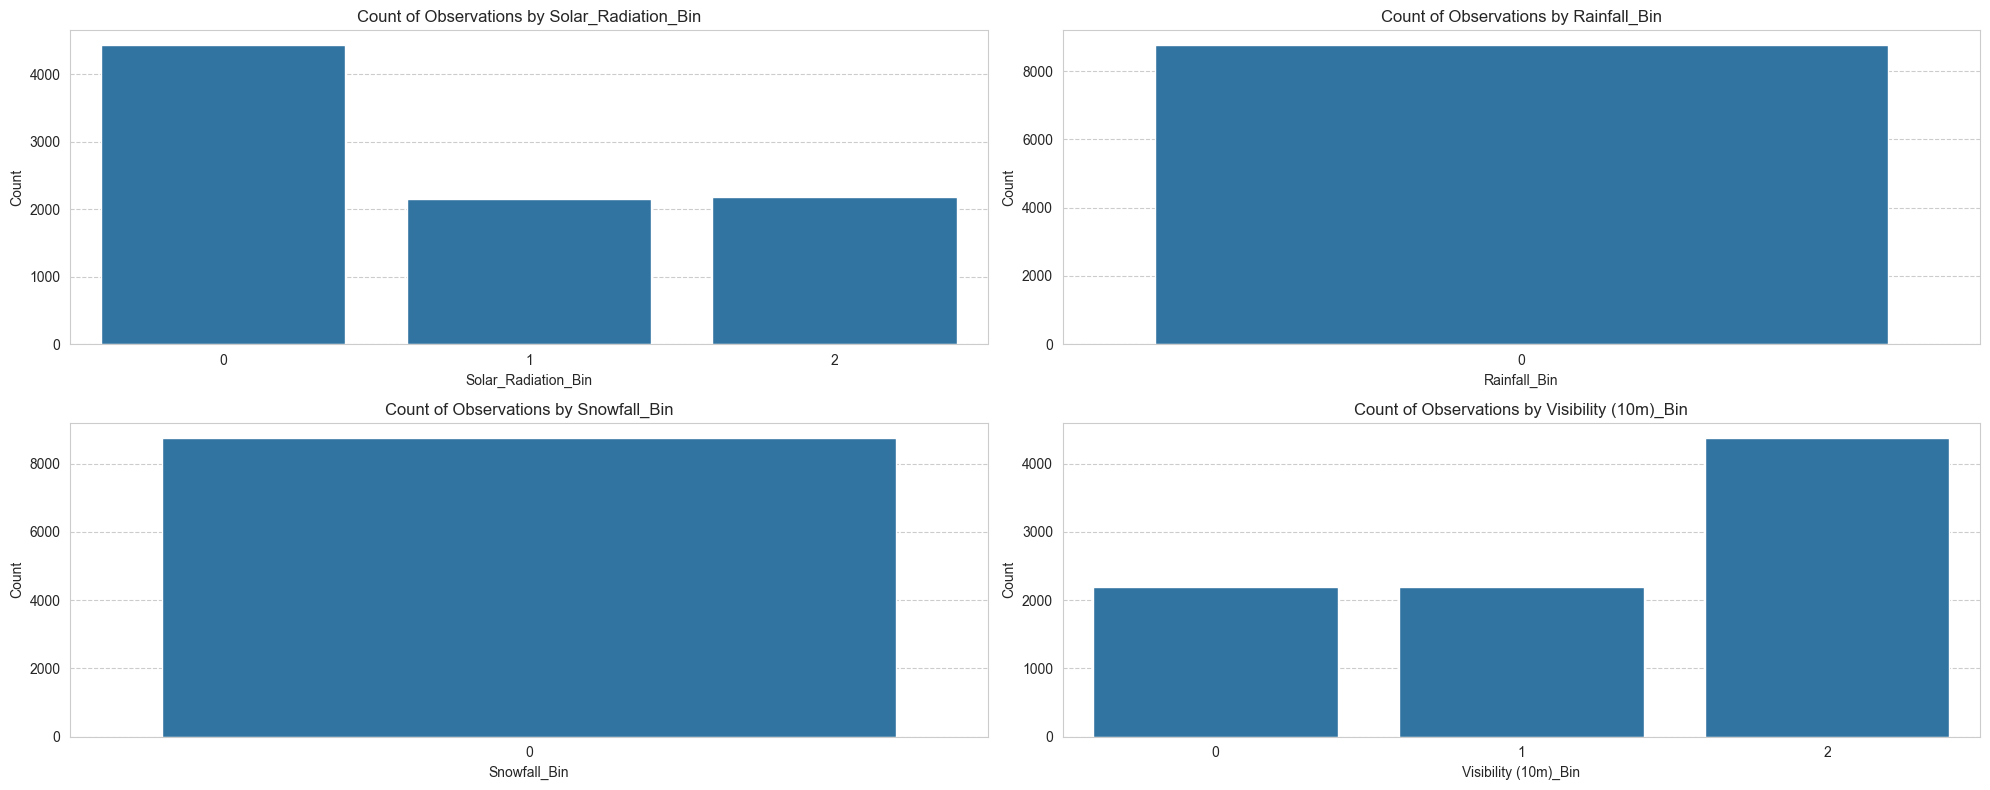

In [44]:
plt.figure(figsize=(20, 8))

for i, feature in enumerate(binned_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of Observations by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [45]:
df['Rainfall_Bin'] = (df['Rainfall(mm)'] > 0).astype(int)
df['Snowfall_Bin'] = (df['Snowfall (cm)'] > 0).astype(int)

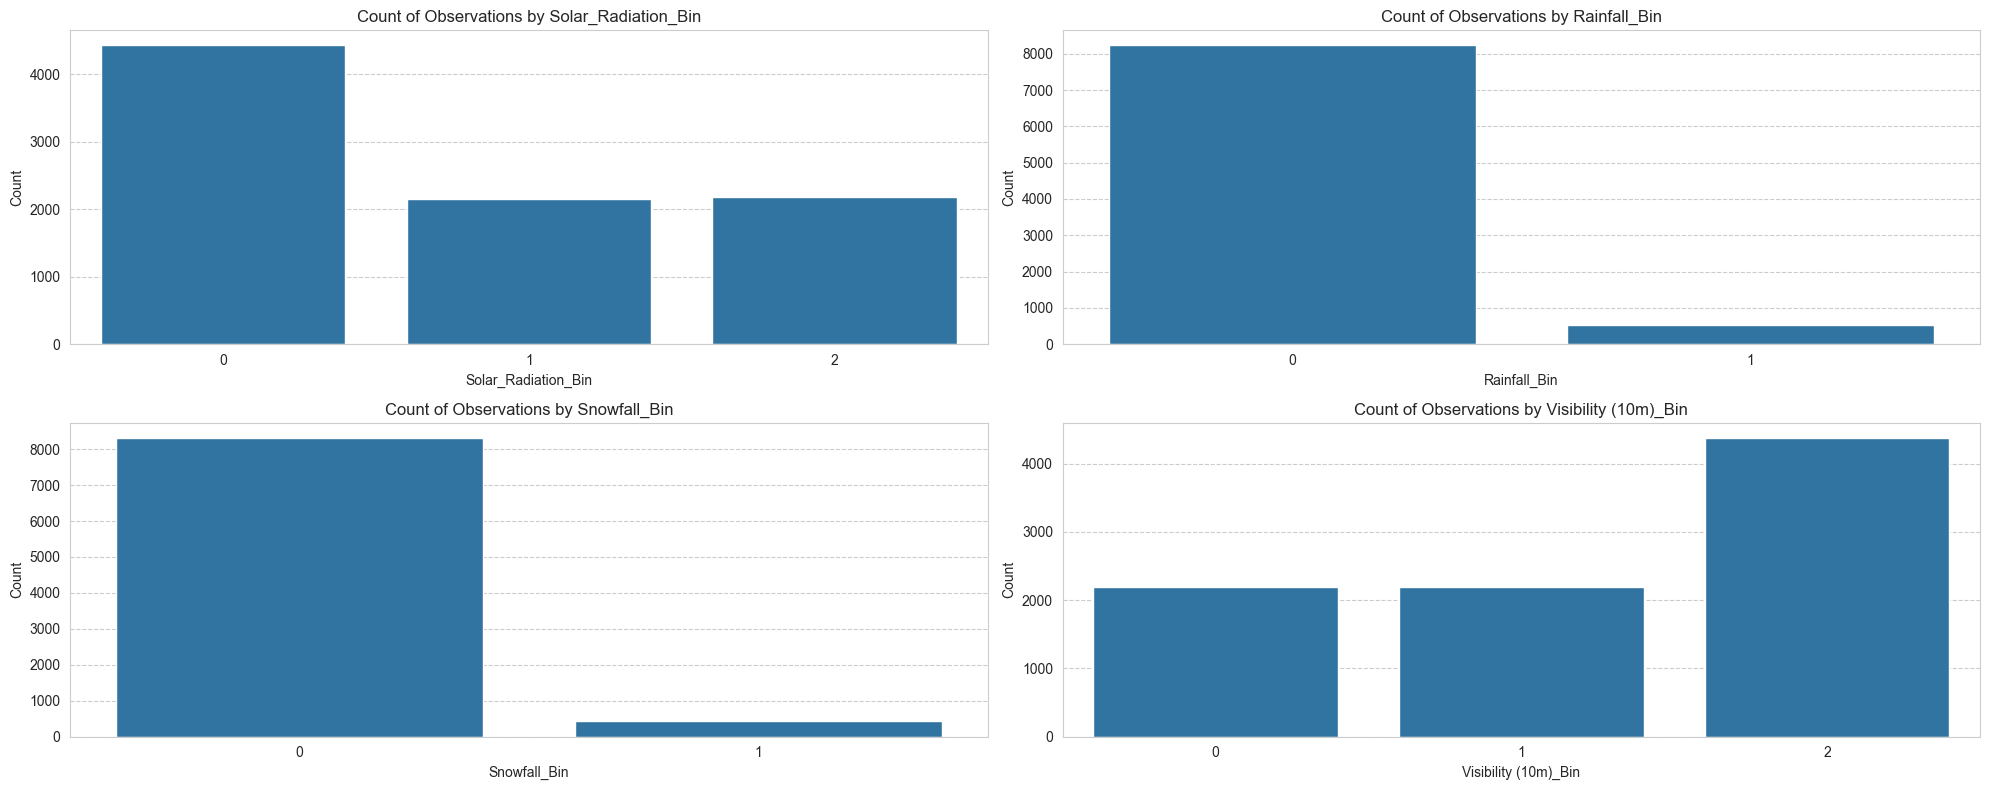

In [46]:
plt.figure(figsize=(20, 8))

for i, feature in enumerate(binned_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of Observations by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Model

In [47]:
# 기존 df를 안전하게 복사
new_df = data.copy()

In [48]:
new_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [49]:
#splitting the data into train and test set
X = new_df.drop(columns=['Rented Bike Count'])
y = new_df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data preprocessing

1. Functioning Day yes인거 위주로 모델 구성
2. Functioning Day가 no면 무조건 y=0
3. 극단적인 연속형 변수들에 대한 사분위 Bining -> categorical 
4. 일부는 df['Rainfall_Bin'] = (df['Rainfall(mm)'] > 0).astype(int)
df['Snowfall_Bin'] = (df['Snowfall (cm)'] > 0).astype(int) 할것
4. 종속 변수와 심하게 right-skewed된 연속형 변수에 sqrt 적용
5. 요일 기준으로 주말/평일 구분 Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
6. 최종검토후 범주형 처리

In [50]:
# 1. Functioning Day == 'Yes' 데이터만 사용
#  Sathishkumar et al. (2020)참고
train_mask = X_train['Functioning Day'] == 'Yes'
test_mask = X_test['Functioning Day'] == 'Yes'

X_train = X_train[train_mask].copy()
y_train = y_train[train_mask].copy()

X_test = X_test[test_mask].copy()
y_test = y_test[test_mask].copy()

In [51]:
X_train.drop(columns=['Functioning Day'], inplace=True, errors='ignore')
X_test.drop(columns=['Functioning Day'], inplace=True, errors='ignore')

In [52]:
# 2. Binary Binning
X_train['Rainfall_Bin'] = (X_train['Rainfall(mm)'] > 0).astype(int)
X_test['Rainfall_Bin'] = (X_test['Rainfall(mm)'] > 0).astype(int)

X_train['Snowfall_Bin'] = (X_train['Snowfall (cm)'] > 0).astype(int)
X_test['Snowfall_Bin'] = (X_test['Snowfall (cm)'] > 0).astype(int)


In [53]:
# 기존 변수 삭제
X_train.drop(columns=['Rainfall(mm)', 'Snowfall (cm)'], inplace=True, errors='ignore')
X_test.drop(columns=['Rainfall(mm)', 'Snowfall (cm)'], inplace=True, errors='ignore')

In [54]:
# 3. Quantile Binning (train 기준 bin 경계 추출 후 적용)
solar_bins = pd.qcut(X_train['Solar Radiation (MJ/m2)'], q=4, retbins=True, duplicates='drop')[1]
visib_bins = pd.qcut(X_train['Visibility (10m)'], q=4, retbins=True, duplicates='drop')[1]

X_train['Solar_Radiation_Bin'] = pd.cut(X_train['Solar Radiation (MJ/m2)'], bins=solar_bins, labels=False, include_lowest=True)
X_test['Solar_Radiation_Bin'] = pd.cut(X_test['Solar Radiation (MJ/m2)'], bins=solar_bins, labels=False, include_lowest=True)

X_train['Visibility_Bin'] = pd.cut(X_train['Visibility (10m)'], bins=visib_bins, labels=False, include_lowest=True)
X_test['Visibility_Bin'] = pd.cut(X_test['Visibility (10m)'], bins=visib_bins, labels=False, include_lowest=True)


In [55]:
# 기존 변수 삭제
X_train.drop(columns=['Visibility (10m)', 'Solar Radiation (MJ/m2)'], inplace=True, errors='ignore')
X_test.drop(columns=['Visibility (10m)', 'Solar Radiation (MJ/m2)'], inplace=True, errors='ignore')

In [56]:
# 4. sqrt 적용 (종속변수 + Wind speed)
y_train = np.sqrt(y_train)
y_test = np.sqrt(y_test)

X_train['Wind speed (m/s)'] = np.sqrt(X_train['Wind speed (m/s)'])
X_test['Wind speed (m/s)'] = np.sqrt(X_test['Wind speed (m/s)'])

In [57]:
# 5. 요일 기반 주말/평일 구분 파생변수 생성
X_train['Date']= pd.to_datetime(X_train['Date'], dayfirst=True)
X_train['day_of_week'] = X_train['Date'].dt.day_name() # extract week name from Date column
X_train["month"] = X_train['Date'].dt.month_name()   # extract month name from Date column
X_train["year"] = X_train['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [58]:
X_train['week'] = X_train['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

In [59]:
X_test['Date']= pd.to_datetime(X_test['Date'], dayfirst=True)
X_test['day_of_week'] = X_test['Date'].dt.day_name() # extract week name from Date column
X_test["month"] = X_test['Date'].dt.month_name()   # extract month name from Date column
X_test["year"] = X_test['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 
X_test['week'] = X_test['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

In [60]:
# 기존 변수 삭제
X_train.drop(columns=['Date', 'day_of_week'], inplace=True, errors='ignore')
X_test.drop(columns=['Date', 'day_of_week'], inplace=True, errors='ignore')

In [61]:
#6. Delete Dew point temperature(°C) column
X_train.drop(columns=['Dew point temperature(°C)'], inplace=True, errors='ignore')
X_test.drop(columns=['Dew point temperature(°C)'], inplace=True, errors='ignore')

In [62]:
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s) Seasons  \
8415    15             13.2           61          1.974842  Autumn   
5049     9             22.9           86          1.303840  Summer   
8395    19             11.2           46          1.183216  Autumn   
1535    23             -2.6           69          1.414214  Winter   
5518    22             27.2           73          1.224745  Summer   

         Holiday  Rainfall_Bin  Snowfall_Bin  Solar_Radiation_Bin  \
8415  No Holiday             0             0                    2   
5049  No Holiday             0             0                    1   
8395  No Holiday             0             0                    0   
1535  No Holiday             0             0                    0   
5518  No Holiday             0             0                    0   

      Visibility_Bin     month  year      week  
8415               0  November  2018  Weekdays  
5049               0      June  2018  Weekdays  
8395               0  November  2018  Weekdays  
1535               1  February  2018  Weekdays  
5518               1      July  2018  Weekdays

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6771 entries, 8415 to 7270
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hour                 6771 non-null   int64  
 1   Temperature(°C)      6771 non-null   float64
 2   Humidity(%)          6771 non-null   int64  
 3   Wind speed (m/s)     6771 non-null   float64
 4   Seasons              6771 non-null   object 
 5   Holiday              6771 non-null   object 
 6   Rainfall_Bin         6771 non-null   int64  
 7   Snowfall_Bin         6771 non-null   int64  
 8   Solar_Radiation_Bin  6771 non-null   int64  
 9   Visibility_Bin       6771 non-null   int64  
 10  month                6771 non-null   object 
 11  year                 6771 non-null   object 
 12  week                 6771 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 740.6+ KB


In [64]:
categorical_bin_vars = ['Rainfall_Bin', 'Snowfall_Bin', 'Solar_Radiation_Bin', 'Visibility_Bin', 'Hour']

for col in categorical_bin_vars:
    X_train[col] = X_train[col].astype('object')
    X_test[col] = X_test[col].astype('object')

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6771 entries, 8415 to 7270
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hour                 6771 non-null   object 
 1   Temperature(°C)      6771 non-null   float64
 2   Humidity(%)          6771 non-null   int64  
 3   Wind speed (m/s)     6771 non-null   float64
 4   Seasons              6771 non-null   object 
 5   Holiday              6771 non-null   object 
 6   Rainfall_Bin         6771 non-null   object 
 7   Snowfall_Bin         6771 non-null   object 
 8   Solar_Radiation_Bin  6771 non-null   object 
 9   Visibility_Bin       6771 non-null   object 
 10  month                6771 non-null   object 
 11  year                 6771 non-null   object 
 12  week                 6771 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 740.6+ KB


In [66]:
# 6. 범주형 처리 (get_dummies + 열 정렬)
X_train = pd.get_dummies(X_train, drop_first=True, sparse=False)
X_test = pd.get_dummies(X_test, drop_first=True, sparse=False)

# 열 정렬 및 누락 열 처리
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6771 entries, 8415 to 7270
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature(°C)        6771 non-null   float64
 1   Humidity(%)            6771 non-null   int64  
 2   Wind speed (m/s)       6771 non-null   float64
 3   Hour_1                 6771 non-null   bool   
 4   Hour_2                 6771 non-null   bool   
 5   Hour_3                 6771 non-null   bool   
 6   Hour_4                 6771 non-null   bool   
 7   Hour_5                 6771 non-null   bool   
 8   Hour_6                 6771 non-null   bool   
 9   Hour_7                 6771 non-null   bool   
 10  Hour_8                 6771 non-null   bool   
 11  Hour_9                 6771 non-null   bool   
 12  Hour_10                6771 non-null   bool   
 13  Hour_11                6771 non-null   bool   
 14  Hour_12                6771 non-null   bool   
 15  Hour_1

## Linear Model

In [68]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

In [69]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

In [70]:
# 예측값과 실제값 역변환 (제곱)
y_test_inv = y_test ** 2
y_pred_lin_inv = y_pred_lin ** 2

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lin = mean_squared_error(y_test_inv, y_pred_lin_inv)
r2_lin = r2_score(y_test_inv, y_pred_lin_inv)
rmse_lin = np.sqrt(mse_lin)
adj_r2_lin = adjusted_r2_score(y_test_inv, y_pred_lin_inv, X_test.shape[1])
print("🔹 Linear Regression Results")
print("MSE:", mse_lin)
print("R2 Score:", r2_lin)
print("RMSE:", rmse_lin)
print("Adjusted R2 Score:", adj_r2_lin)

🔹 Linear Regression Results
MSE: 88319.15975758155
R2 Score: 0.7863407134668567
RMSE: 297.1853962723969
Adjusted R2 Score: 0.779972523053156


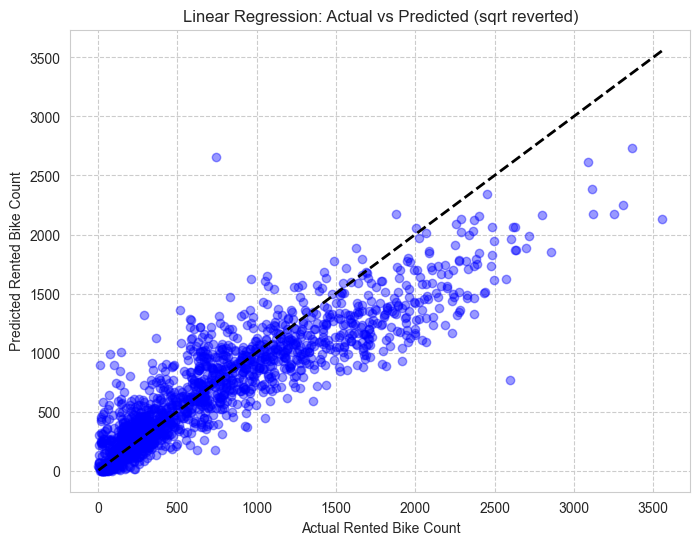

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_inv, y_pred_lin_inv, alpha=0.4, color='blue')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--', lw=2)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Linear Regression: Actual vs Predicted (sqrt reverted)')
plt.grid(True)
plt.show()

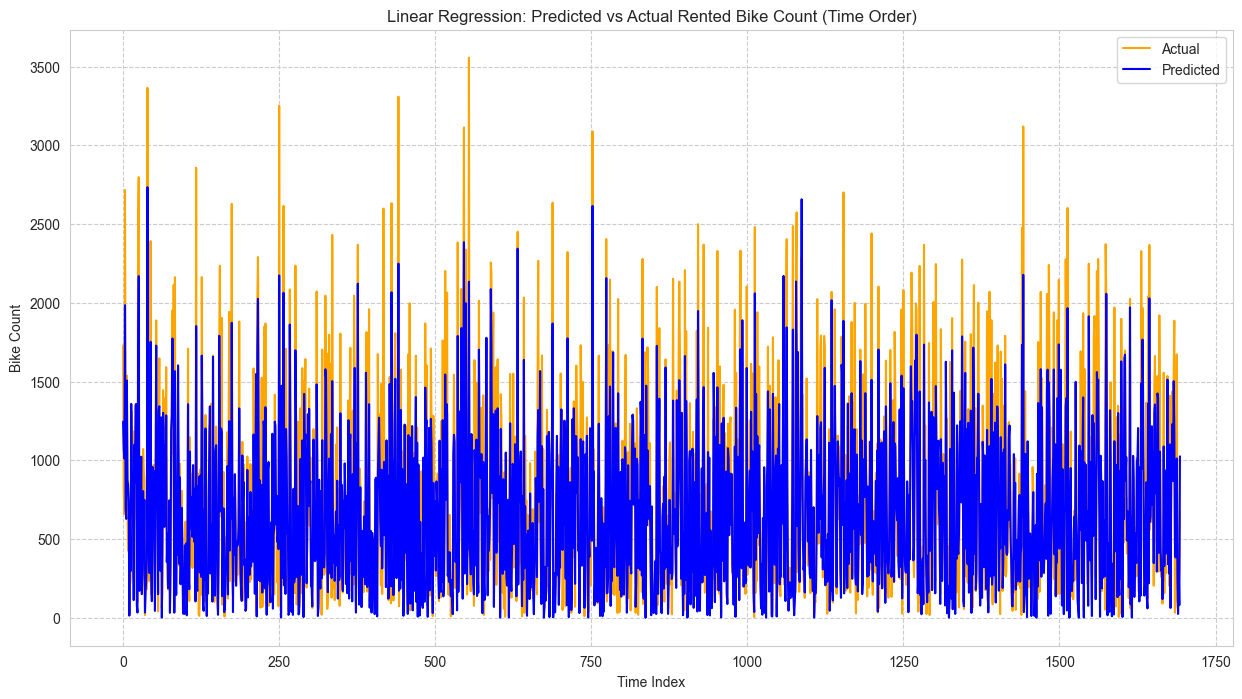

In [87]:
plt.figure(figsize=(15, 8))

plt.plot(y_test_inv.reset_index(drop=True), label='Actual', color='orange')
plt.plot(pd.Series(y_pred_lin_inv).reset_index(drop=True), label='Predicted', color='blue')

plt.title('Linear Regression: Predicted vs Actual Rented Bike Count (Time Order)')
plt.xlabel('Time Index')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.show()

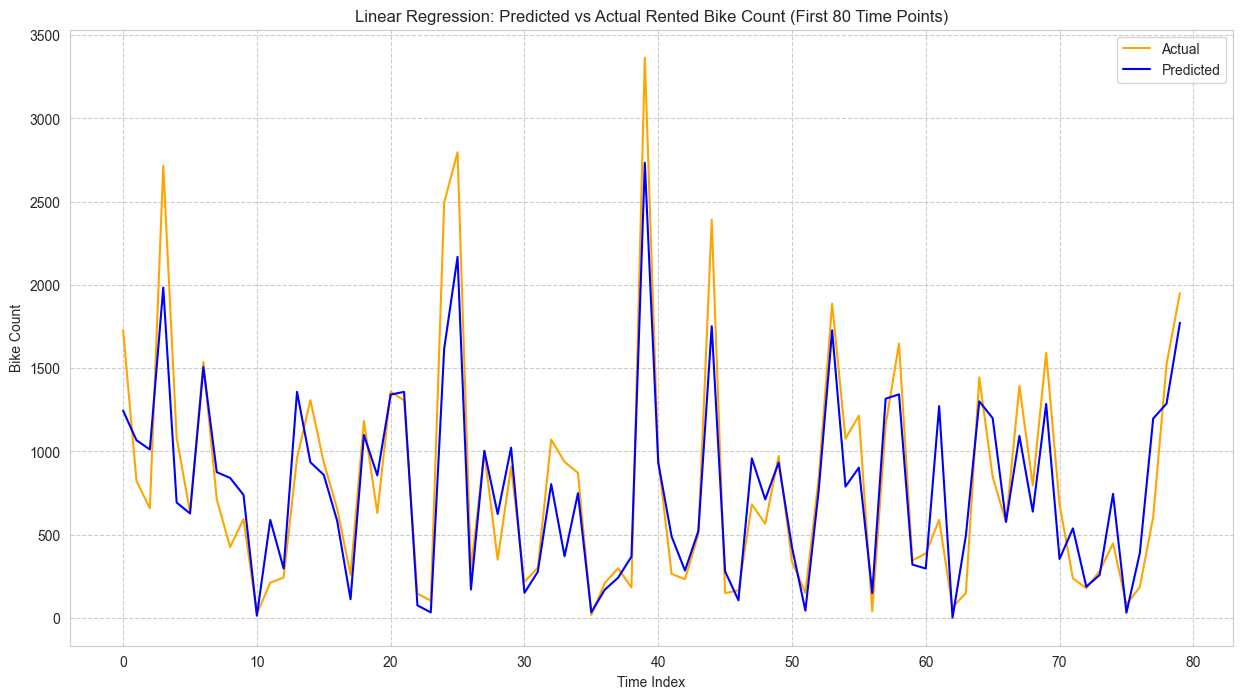

In [88]:
plt.figure(figsize=(15, 8))

plt.plot(y_test_inv.reset_index(drop=True).iloc[:80], label='Actual', color='orange')
plt.plot(pd.Series(y_pred_lin_inv).reset_index(drop=True).iloc[:80], label='Predicted', color='blue')

plt.title('Linear Regression: Predicted vs Actual Rented Bike Count (First 80 Time Points)')
plt.xlabel('Time Index')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.show()

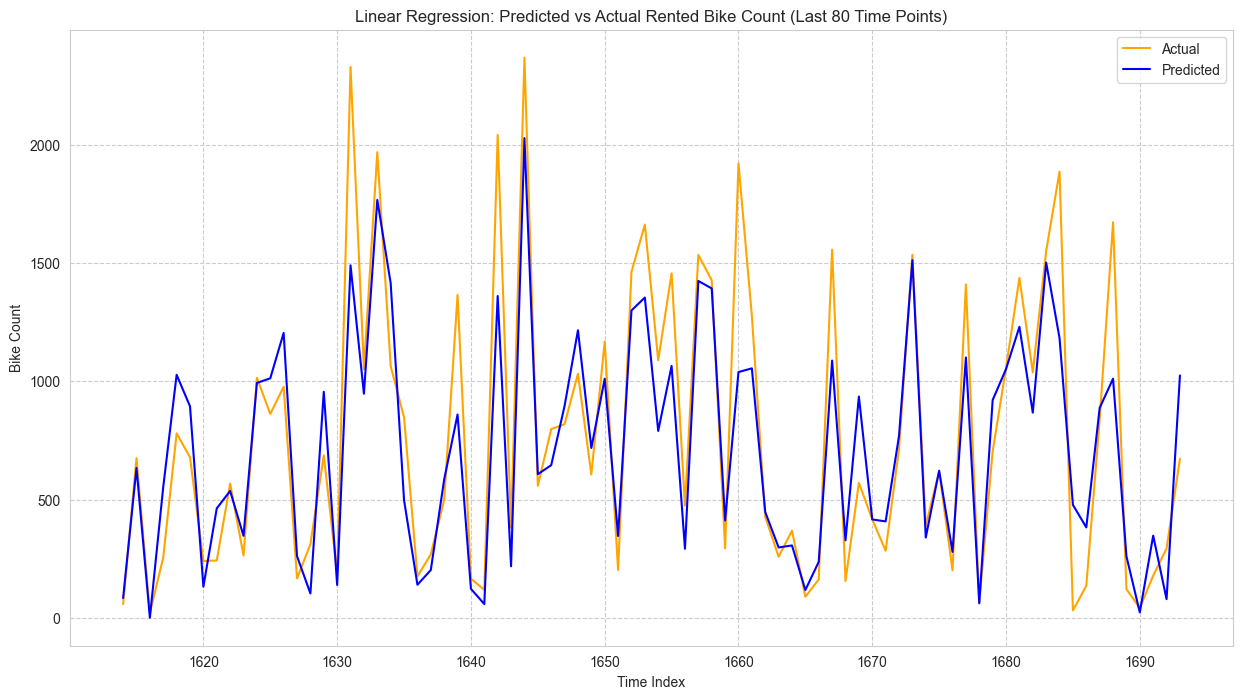

In [89]:
plt.figure(figsize=(15, 8))

plt.plot(y_test_inv.reset_index(drop=True).iloc[-80:], label='Actual', color='orange')
plt.plot(pd.Series(y_pred_lin_inv).reset_index(drop=True).iloc[-80:], label='Predicted', color='blue')

plt.title('Linear Regression: Predicted vs Actual Rented Bike Count (Last 80 Time Points)')
plt.xlabel('Time Index')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.show()

## Random forest

In [77]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skopt.space import Integer

# Train-validation 분할
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# 모델 정의
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# 탐색 공간 정의
search_spaces = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(5, 30),
    'min_samples_split': Integer(2, 10)
}

# BayesSearchCV 설정
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=25,                    # 탐색 횟수 (증가 가능)
    scoring='neg_mean_squared_error',
    cv=3,                         # 내부적으로 cross-validation 사용
    n_jobs=-1,
    random_state=42,
    verbose=0
)

# 최적화 수행 (train set만 사용)
opt.fit(X_train_rf, y_train_rf)

# 최적 하이퍼파라미터 출력
print("✅ Best parameters:", opt.best_params_)
print("✅ Best validation MSE:", -opt.best_score_)

# 최적 모델을 test set에 적용
y_pred_rf = opt.predict(X_test)

c:\Users\zinhyeok\Developer\seoul_bike\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), np.int64(2), np.int64(300)] before, using random point [np.int64(28), np.int64(5), np.int64(219)]
  warnings.warn(
c:\Users\zinhyeok\Developer\seoul_bike\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), np.int64(2), np.int64(300)] before, using random point [np.int64(18), np.int64(5), np.int64(158)]
  warnings.warn(
c:\Users\zinhyeok\Developer\seoul_bike\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(28), np.int64(2), np.int64(300)] before, using random point [np.int64(19), np.int64(7), np.int64(210)]
  warnings.warn(
c:\Users\zinhyeok\Developer\seoul_bike\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [n

✅ Best parameters: OrderedDict({'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300})
✅ Best validation MSE: 14.173118674665224


In [ ]:
# 예측값과 실제값 역변환 (제곱)
y_test_inv = y_test ** 2
y_pred_rf_inv = y_pred_rf ** 2

In [96]:
mse_rf = mean_squared_error(y_test_inv, y_pred_rf_inv)
r2_rf = r2_score(y_test_inv, y_pred_rf_inv)
rmse_rf = np.sqrt(mse_rf)
adj_r2_rf = adjusted_r2_score(y_test_inv, y_pred_rf_inv, X_test.shape[1])
print("🔸 Random Forest Results")
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)
print("RMSE:", rmse_rf)
print(f"Adjusted R²: {adj_r2_rf:.4f}")

🔸 Random Forest Results
MSE: 36830.20779334443
R2 Score: 0.91090137245879
RMSE: 191.9119792856726
Adjusted R²: 0.9082


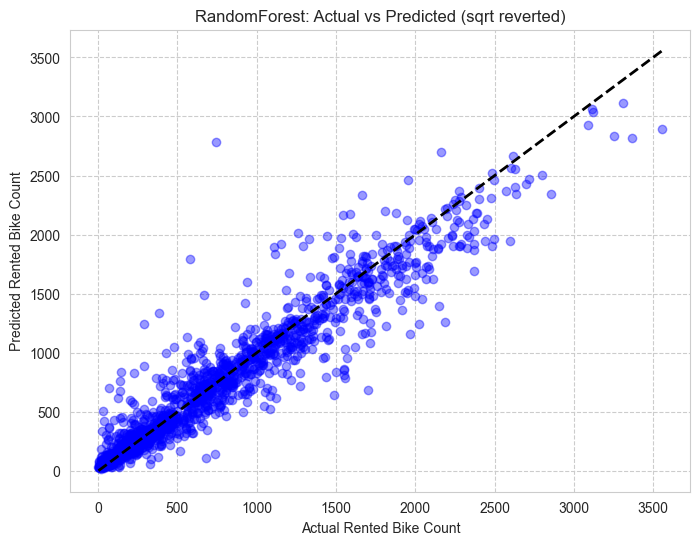

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_inv, y_pred_rf_inv, alpha=0.4, color='blue')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--', lw=2)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('RandomForest: Actual vs Predicted (sqrt reverted)')
plt.grid(True)
plt.show()

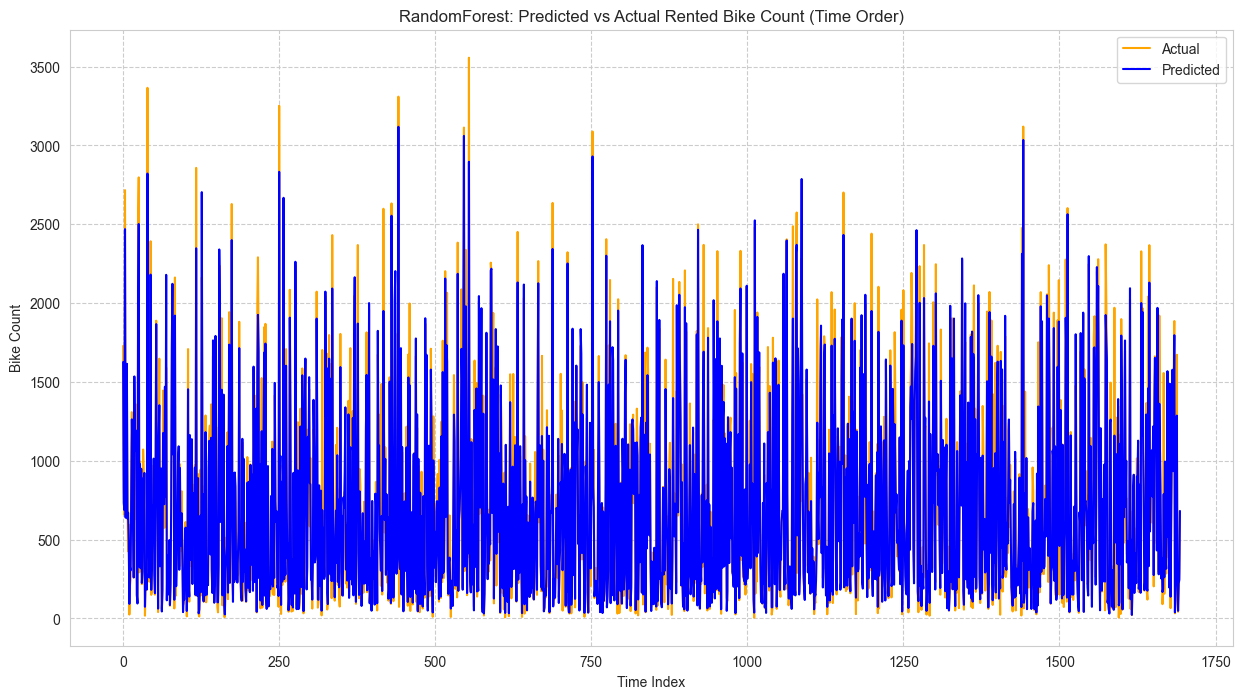

In [90]:
plt.figure(figsize=(15, 8))

plt.plot(y_test_inv.reset_index(drop=True), label='Actual', color='orange')
plt.plot(pd.Series(y_pred_rf_inv).reset_index(drop=True), label='Predicted', color='blue')

plt.title('RandomForest: Predicted vs Actual Rented Bike Count (Time Order)')
plt.xlabel('Time Index')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.show()

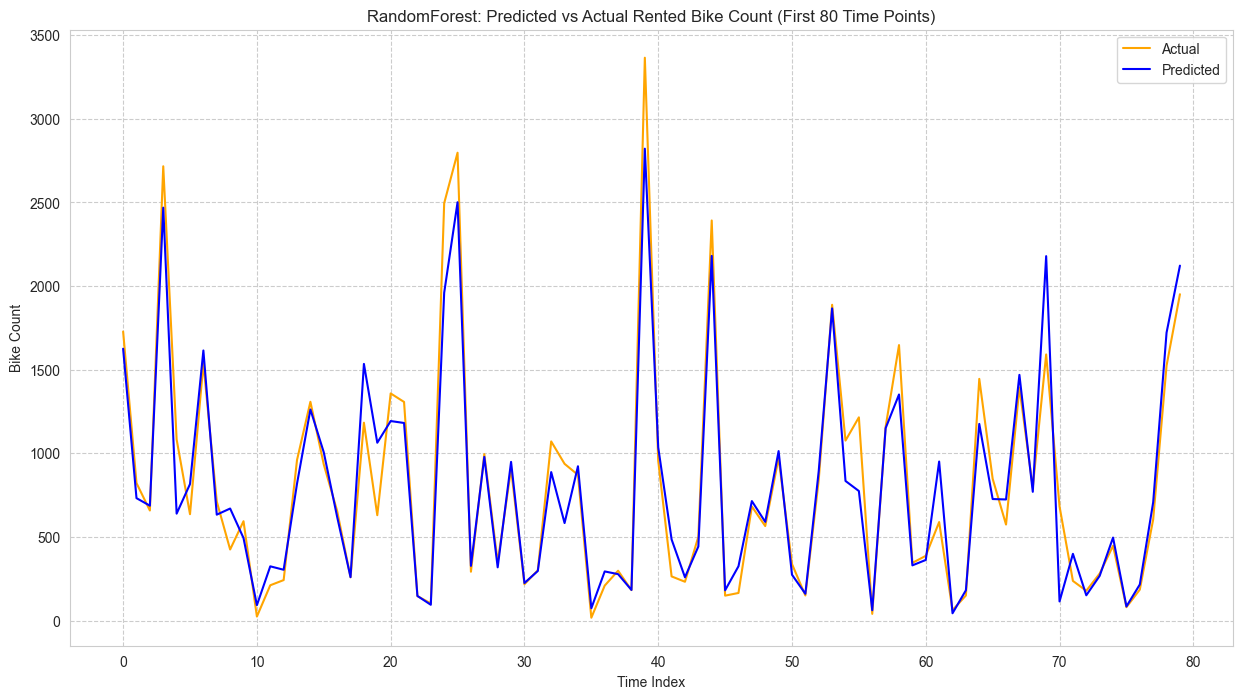

In [91]:
plt.figure(figsize=(15, 8))

plt.plot(y_test_inv.reset_index(drop=True).iloc[:80], label='Actual', color='orange')
plt.plot(pd.Series(y_pred_rf_inv).reset_index(drop=True).iloc[:80], label='Predicted', color='blue')

plt.title('RandomForest: Predicted vs Actual Rented Bike Count (First 80 Time Points)')
plt.xlabel('Time Index')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.show()

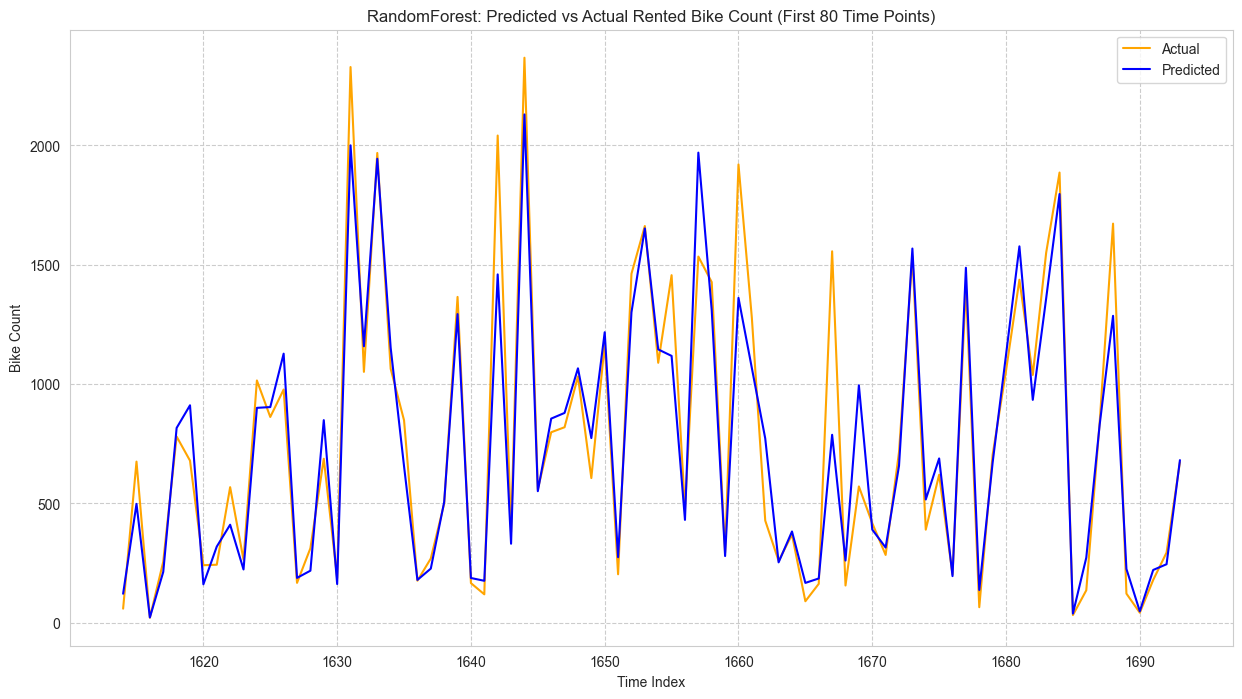

In [92]:
plt.figure(figsize=(15, 8))

plt.plot(y_test_inv.reset_index(drop=True).iloc[-80:], label='Actual', color='orange')
plt.plot(pd.Series(y_pred_rf_inv).reset_index(drop=True).iloc[-80:], label='Predicted', color='blue')

plt.title('RandomForest: Predicted vs Actual Rented Bike Count (First 80 Time Points)')
plt.xlabel('Time Index')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.show()

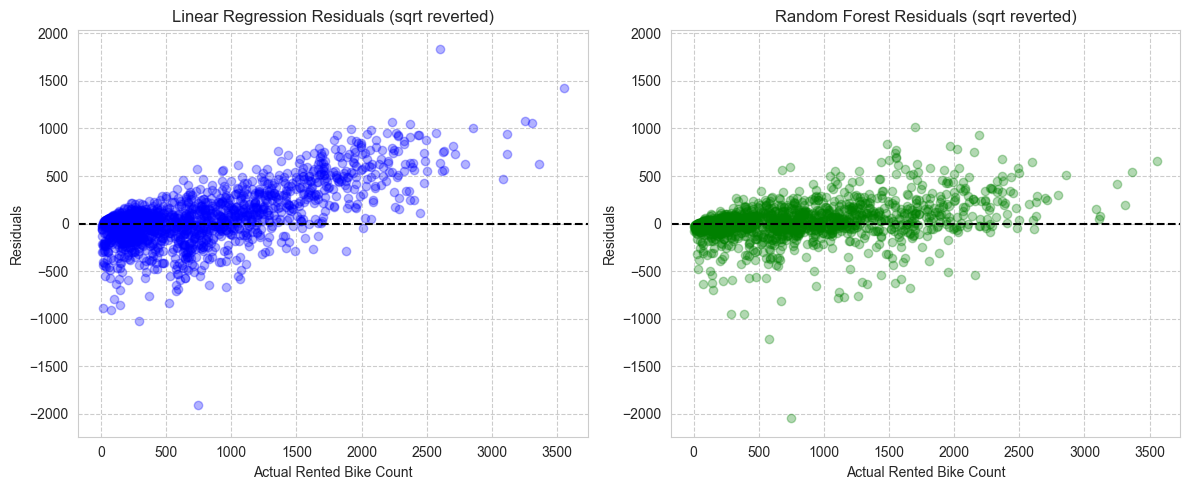

In [93]:
# 잔차 계산
residual_lin = y_test_inv - y_pred_lin_inv
residual_rf = y_test_inv - y_pred_rf_inv

# 공통 y축 범위 계산
resid_min = min(residual_lin.min(), residual_rf.min()) - 200
resid_max = max(residual_lin.max(), residual_rf.max()) + 200

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_inv, residual_lin, alpha=0.3, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Linear Regression Residuals (sqrt reverted)")
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Residuals")
plt.ylim(resid_min, resid_max)  # y축 범위 고정

plt.subplot(1, 2, 2)
plt.scatter(y_test_inv, residual_rf, alpha=0.3, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title("Random Forest Residuals (sqrt reverted)")
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Residuals")
plt.ylim(resid_min, resid_max)  # y축 범위 고정

plt.tight_layout()
plt.show()



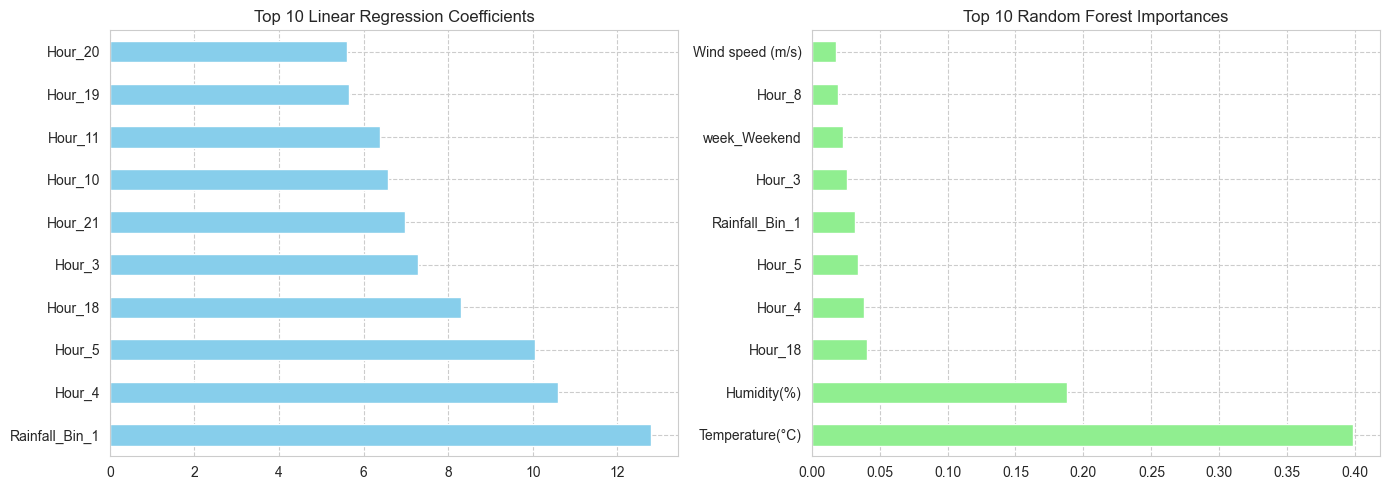

In [94]:
coeffs = pd.Series(linreg.coef_, index=X_train.columns)
rf = opt.best_estimator_
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

top_coeffs = coeffs.abs().sort_values(ascending=False).head(10)
top_importances = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
top_coeffs.plot(kind='barh', color='skyblue')
plt.title("Top 10 Linear Regression Coefficients")

plt.subplot(1, 2, 2)
top_importances.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Random Forest Importances")

plt.tight_layout()
plt.show()
